In [102]:
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

from sklearn.metrics import mean_absolute_error

import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

import xgboost as xgb

from xgboost import XGBRegressor

from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [103]:
class XGBoostWithEarlyStop(BaseEstimator):
    def __init__(self, early_stopping_rounds=5, test_size=0.1, 
                 eval_metric='mae', **estimator_params):
        
        self.early_stopping_rounds = early_stopping_rounds
        self.test_size = test_size
        self.eval_metric=eval_metric='mae'        
        if self.estimator is not None:
            self.set_params(**estimator_params)

    def set_params(self, **params):
        return self.estimator.set_params(**params)

    def get_params(self, **params):
        return self.estimator.get_params()

    def fit(self, X, y):
        x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size)
        self.estimator.fit(x_train, y_train, 
                           early_stopping_rounds=self.early_stopping_rounds, 
                           eval_metric=self.eval_metric, eval_set=[(x_val, y_val)])
        return self

    def predict(self, X):
        return self.estimator.predict(X)

class XGBoostRegressorWithEarlyStop(XGBoostWithEarlyStop):
    def __init__(self, *args, **kwargs):
        self.estimator = XGBRegressor()
        super(XGBoostRegressorWithEarlyStop, self).__init__(*args, **kwargs)

In [105]:
x, y = datasets.load_diabetes(return_X_y=True)
print(x.shape, y.shape)
# (442, 10) (442,)

pipe1 = Pipeline([
    ('sc1', StandardScaler()),
    ('pca', PCA(5)),
    ('xgb', XGBoostRegressorWithEarlyStop())
])

pipe2 = Pipeline([
    ('sc1', MinMaxScaler()),
    ('pca', PCA(5)),
    ('xgb', XGBoostRegressorWithEarlyStop())
])

pipe3 = Pipeline([
    ('sc1', MaxAbsScaler()),
    ('pca', PCA(5)),
    ('xgb', XGBoostRegressorWithEarlyStop())
])

(442, 10) (442,)


In [107]:
scale_d = {pipe1:'standard',pipe2:'minmax',pipe3:'maxabs'}

In [114]:
best

{'standard': {'pca__n_components': 5, 'xgb__n_estimators': 30}}

In [115]:
best=dict()
for pipe in [pipe1,pipe2,pipe3]:
    
    print ("Scaling - {}".format(scale_d[pipe]))
    param_grid = {
        'pca__n_components': [3, 5, 7],
        'xgb__n_estimators': [10, 20, 30, 50],
        'xgb__learning_rate': [.01, .05, .1, .15],
        'xgb__max_depth': [1,2,3,4,5]
    }
    
    grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_absolute_error')
    grid.fit(x, y)
    best[scale_d[pipe]] = grid.best_params_
    print(grid.best_params_)
    
    best_acc = 0.0
    best_clf = 0
    best_pipe = ''
    for idx, val in enumerate([pipe]):
        if val.score(X_test, y_test) > best_acc:
            best_acc = val.score(X_test, y_test)
            best_pipe = val
            best_clf = idx
    print('Classifier with best accuracy: %s\n' % pipe_dicts[best_clf])
    

Scaling - standard
[0]	validation_0-mae:157.937
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:156.389
[2]	validation_0-mae:154.857
[3]	validation_0-mae:153.34
[4]	validation_0-mae:151.838
[5]	validation_0-mae:150.35
[6]	validation_0-mae:148.878
[7]	validation_0-mae:147.42
[8]	validation_0-mae:145.977
[9]	validation_0-mae:144.548
[0]	validation_0-mae:141.801
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:140.284
[2]	validation_0-mae:138.782
[3]	validation_0-mae:137.295
[4]	validation_0-mae:135.822
[5]	validation_0-mae:134.365
[6]	validation_0-mae:132.921
[7]	validation_0-mae:131.496
[8]	validation_0-mae:130.081
[9]	validation_0-mae:128.684
[0]	validation_0-mae:171.471
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:169.991
[2]	validation_0-mae:168.525
[3]	validation_0-mae:167.073
[4]	validation_0-mae:165.636
[5]	validation_0-mae:164.214
[6]	validation_0-mae:162.805
[7]	validati

[25]	validation_0-mae:127.082
[26]	validation_0-mae:125.886
[27]	validation_0-mae:124.751
[28]	validation_0-mae:123.577
[29]	validation_0-mae:122.505
[30]	validation_0-mae:121.409
[31]	validation_0-mae:120.38
[32]	validation_0-mae:119.299
[33]	validation_0-mae:118.236
[34]	validation_0-mae:117.237
[35]	validation_0-mae:116.194
[36]	validation_0-mae:115.252
[37]	validation_0-mae:114.34
[38]	validation_0-mae:113.384
[39]	validation_0-mae:112.43
[40]	validation_0-mae:111.546
[41]	validation_0-mae:110.617
[42]	validation_0-mae:109.75
[43]	validation_0-mae:108.861
[44]	validation_0-mae:108.003
[45]	validation_0-mae:107.214
[46]	validation_0-mae:106.404
[47]	validation_0-mae:105.631
[48]	validation_0-mae:104.837
[49]	validation_0-mae:104.079
[0]	validation_0-mae:151.243
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:149.932
[2]	validation_0-mae:148.634
[3]	validation_0-mae:147.349
[4]	validation_0-mae:146.077
[5]	validation_0-mae:144.818
[6]	validation_0-

[1]	validation_0-mae:152.542
[2]	validation_0-mae:151.173
[3]	validation_0-mae:149.844
[4]	validation_0-mae:148.503
[5]	validation_0-mae:147.2
[6]	validation_0-mae:145.885
[7]	validation_0-mae:144.582
[8]	validation_0-mae:143.318
[9]	validation_0-mae:142.041
[10]	validation_0-mae:140.788
[11]	validation_0-mae:139.55
[12]	validation_0-mae:138.31
[13]	validation_0-mae:137.106
[14]	validation_0-mae:135.89
[15]	validation_0-mae:134.698
[16]	validation_0-mae:133.52
[17]	validation_0-mae:132.338
[18]	validation_0-mae:131.183
[19]	validation_0-mae:130.025
[20]	validation_0-mae:128.903
[21]	validation_0-mae:127.727
[22]	validation_0-mae:126.562
[23]	validation_0-mae:125.409
[24]	validation_0-mae:124.319
[25]	validation_0-mae:123.189
[26]	validation_0-mae:122.121
[27]	validation_0-mae:121.013
[28]	validation_0-mae:119.915
[29]	validation_0-mae:118.869
[30]	validation_0-mae:117.793
[31]	validation_0-mae:116.728
[32]	validation_0-mae:115.712
[33]	validation_0-mae:114.676
[34]	validation_0-mae:113

[20]	validation_0-mae:127.347
[21]	validation_0-mae:126.197
[22]	validation_0-mae:125.06
[23]	validation_0-mae:123.928
[24]	validation_0-mae:122.818
[25]	validation_0-mae:121.77
[26]	validation_0-mae:120.75
[27]	validation_0-mae:119.723
[28]	validation_0-mae:118.706
[29]	validation_0-mae:117.696
[0]	validation_0-mae:161.966
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:160.446
[2]	validation_0-mae:158.941
[3]	validation_0-mae:157.451
[4]	validation_0-mae:155.975
[5]	validation_0-mae:154.511
[6]	validation_0-mae:153.06
[7]	validation_0-mae:151.627
[8]	validation_0-mae:150.205
[9]	validation_0-mae:148.797
[10]	validation_0-mae:147.4
[11]	validation_0-mae:146.016
[12]	validation_0-mae:144.632
[13]	validation_0-mae:143.26
[14]	validation_0-mae:141.916
[15]	validation_0-mae:140.589
[16]	validation_0-mae:139.257
[17]	validation_0-mae:137.958
[18]	validation_0-mae:136.668
[19]	validation_0-mae:135.376
[20]	validation_0-mae:134.112
[21]	validation_0-mae:13

[9]	validation_0-mae:123.377
[10]	validation_0-mae:122.147
[11]	validation_0-mae:120.93
[12]	validation_0-mae:119.76
[13]	validation_0-mae:118.572
[14]	validation_0-mae:117.388
[15]	validation_0-mae:116.277
[16]	validation_0-mae:115.1
[17]	validation_0-mae:114
[18]	validation_0-mae:112.882
[19]	validation_0-mae:111.79
[0]	validation_0-mae:134.341
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:133.023
[2]	validation_0-mae:131.691
[3]	validation_0-mae:130.399
[4]	validation_0-mae:129.093
[5]	validation_0-mae:127.846
[6]	validation_0-mae:126.585
[7]	validation_0-mae:125.36
[8]	validation_0-mae:124.15
[9]	validation_0-mae:122.923
[10]	validation_0-mae:121.739
[11]	validation_0-mae:120.542
[12]	validation_0-mae:119.384
[13]	validation_0-mae:118.212
[14]	validation_0-mae:117.077
[15]	validation_0-mae:115.927
[16]	validation_0-mae:114.813
[17]	validation_0-mae:113.683
[18]	validation_0-mae:112.59
[19]	validation_0-mae:111.503
[0]	validation_0-mae:152.938
W

[20]	validation_0-mae:91.6301
[21]	validation_0-mae:90.5634
[22]	validation_0-mae:89.4716
[23]	validation_0-mae:88.3766
[24]	validation_0-mae:87.3616
[25]	validation_0-mae:86.3305
[26]	validation_0-mae:85.314
[27]	validation_0-mae:84.2965
[28]	validation_0-mae:83.2709
[29]	validation_0-mae:82.2777
[30]	validation_0-mae:81.2932
[31]	validation_0-mae:80.3293
[32]	validation_0-mae:79.3591
[33]	validation_0-mae:78.422
[34]	validation_0-mae:77.4826
[35]	validation_0-mae:76.6061
[36]	validation_0-mae:75.7568
[37]	validation_0-mae:74.8416
[38]	validation_0-mae:74.0065
[39]	validation_0-mae:73.1897
[40]	validation_0-mae:72.3808
[41]	validation_0-mae:71.5797
[42]	validation_0-mae:70.7799
[43]	validation_0-mae:69.9899
[44]	validation_0-mae:69.2159
[45]	validation_0-mae:68.485
[46]	validation_0-mae:67.7809
[47]	validation_0-mae:67.0682
[48]	validation_0-mae:66.4545
[49]	validation_0-mae:65.9029
[0]	validation_0-mae:165.821
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validat

[47]	validation_0-mae:95.6318
[48]	validation_0-mae:94.7244
[49]	validation_0-mae:93.7976
[0]	validation_0-mae:137.466
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:135.882
[2]	validation_0-mae:134.313
[3]	validation_0-mae:132.795
[4]	validation_0-mae:131.292
[5]	validation_0-mae:129.807
[6]	validation_0-mae:128.334
[7]	validation_0-mae:126.87
[8]	validation_0-mae:125.428
[9]	validation_0-mae:123.993
[10]	validation_0-mae:122.568
[11]	validation_0-mae:121.165
[12]	validation_0-mae:119.83
[13]	validation_0-mae:118.436
[14]	validation_0-mae:117.066
[15]	validation_0-mae:115.738
[16]	validation_0-mae:114.424
[17]	validation_0-mae:113.117
[18]	validation_0-mae:111.836
[19]	validation_0-mae:110.563
[20]	validation_0-mae:109.306
[21]	validation_0-mae:108.095
[22]	validation_0-mae:106.85
[23]	validation_0-mae:105.625
[24]	validation_0-mae:104.4
[25]	validation_0-mae:103.234
[26]	validation_0-mae:102.045
[27]	validation_0-mae:100.863
[28]	validation_0-mae:

[2]	validation_0-mae:139.942
[3]	validation_0-mae:133.714
[4]	validation_0-mae:127.836
[5]	validation_0-mae:122.21
[6]	validation_0-mae:116.901
[7]	validation_0-mae:111.856
[8]	validation_0-mae:107.097
[9]	validation_0-mae:102.509
[10]	validation_0-mae:98.7142
[11]	validation_0-mae:95.3321
[12]	validation_0-mae:92.1916
[13]	validation_0-mae:89.4393
[14]	validation_0-mae:86.9814
[15]	validation_0-mae:84.6058
[16]	validation_0-mae:82.5697
[17]	validation_0-mae:80.6129
[18]	validation_0-mae:78.8269
[19]	validation_0-mae:77.241
[20]	validation_0-mae:75.9837
[21]	validation_0-mae:74.8422
[22]	validation_0-mae:73.8107
[23]	validation_0-mae:72.834
[24]	validation_0-mae:71.8429
[25]	validation_0-mae:70.9512
[26]	validation_0-mae:70.1052
[27]	validation_0-mae:69.4513
[28]	validation_0-mae:68.8828
[29]	validation_0-mae:68.4491
[0]	validation_0-mae:138.601
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:131.475
[2]	validation_0-mae:125.082
[3]	validation_0-mae:

[10]	validation_0-mae:73.7092
[11]	validation_0-mae:69.8063
[12]	validation_0-mae:65.8103
[13]	validation_0-mae:62.1334
[14]	validation_0-mae:58.997
[15]	validation_0-mae:55.7316
[16]	validation_0-mae:53.1416
[17]	validation_0-mae:50.782
[18]	validation_0-mae:48.7451
[19]	validation_0-mae:47.0803
[20]	validation_0-mae:45.5491
[21]	validation_0-mae:44.3107
[22]	validation_0-mae:43.1687
[23]	validation_0-mae:42.2473
[24]	validation_0-mae:41.3949
[25]	validation_0-mae:40.4809
[26]	validation_0-mae:40.04
[27]	validation_0-mae:39.488
[28]	validation_0-mae:39.104
[29]	validation_0-mae:38.5413
[0]	validation_0-mae:150.191
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:143.081
[2]	validation_0-mae:136.322
[3]	validation_0-mae:129.896
[4]	validation_0-mae:123.68
[5]	validation_0-mae:117.854
[6]	validation_0-mae:112.33
[7]	validation_0-mae:106.885
[8]	validation_0-mae:101.874
[9]	validation_0-mae:96.95
[10]	validation_0-mae:92.4677
[11]	validation_0-mae:88.49

Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:128.717
[2]	validation_0-mae:122.353
[3]	validation_0-mae:116.473
[4]	validation_0-mae:110.494
[5]	validation_0-mae:105.138
[6]	validation_0-mae:100.2
[7]	validation_0-mae:95.3263
[8]	validation_0-mae:90.8322
[9]	validation_0-mae:86.8166
[10]	validation_0-mae:83.1495
[11]	validation_0-mae:80.2373
[12]	validation_0-mae:78.2218
[13]	validation_0-mae:75.8165
[14]	validation_0-mae:74.1544
[15]	validation_0-mae:72.1594
[16]	validation_0-mae:70.2747
[17]	validation_0-mae:68.7955
[18]	validation_0-mae:67.0183
[19]	validation_0-mae:65.4985
[0]	validation_0-mae:141.282
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:134.598
[2]	validation_0-mae:128.024
[3]	validation_0-mae:121.987
[4]	validation_0-mae:115.944
[5]	validation_0-mae:110.058
[6]	validation_0-mae:104.684
[7]	validation_0-mae:99.5518
[8]	validation_0-mae:94.6621
[9]	validation_0-mae:90.3741
[10]	validation_0-mae:86.

[22]	validation_0-mae:70.7125
[23]	validation_0-mae:69.7969
[24]	validation_0-mae:68.765
[25]	validation_0-mae:67.7479
[26]	validation_0-mae:66.7633
[27]	validation_0-mae:65.8825
[28]	validation_0-mae:65.0532
[29]	validation_0-mae:63.9546
[30]	validation_0-mae:63.1775
[31]	validation_0-mae:62.6328
[32]	validation_0-mae:62.0474
[33]	validation_0-mae:61.4515
[34]	validation_0-mae:60.9172
[35]	validation_0-mae:60.4533
[36]	validation_0-mae:59.9365
[37]	validation_0-mae:59.5901
[38]	validation_0-mae:59.2806
[39]	validation_0-mae:58.844
[40]	validation_0-mae:58.4453
[41]	validation_0-mae:58.0657
[42]	validation_0-mae:57.6976
[43]	validation_0-mae:57.3133
[44]	validation_0-mae:57.0069
[45]	validation_0-mae:56.6194
[46]	validation_0-mae:56.3879
[47]	validation_0-mae:56.129
[48]	validation_0-mae:55.9849
[49]	validation_0-mae:55.8245
[0]	validation_0-mae:145.944
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:139.024
[2]	validation_0-mae:132.214
[3]	validatio

[49]	validation_0-mae:56.2408
[0]	validation_0-mae:147.13
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:140.766
[2]	validation_0-mae:135.032
[3]	validation_0-mae:129.271
[4]	validation_0-mae:124.153
[5]	validation_0-mae:118.996
[6]	validation_0-mae:113.955
[7]	validation_0-mae:109.493
[8]	validation_0-mae:105.417
[9]	validation_0-mae:101.471
[10]	validation_0-mae:97.3483
[11]	validation_0-mae:93.9359
[12]	validation_0-mae:90.1449
[13]	validation_0-mae:87.2698
[14]	validation_0-mae:84.3819
[15]	validation_0-mae:81.5436
[16]	validation_0-mae:78.7705
[17]	validation_0-mae:76.8407
[18]	validation_0-mae:75.1734
[19]	validation_0-mae:73.4968
[20]	validation_0-mae:72.0414
[21]	validation_0-mae:70.9474
[22]	validation_0-mae:69.7066
[23]	validation_0-mae:68.8798
[24]	validation_0-mae:67.8282
[25]	validation_0-mae:66.9035
[26]	validation_0-mae:66.0602
[27]	validation_0-mae:65.3972
[28]	validation_0-mae:64.5517
[29]	validation_0-mae:63.668
[30]	validation_0-m

[4]	validation_0-mae:111.891
[5]	validation_0-mae:106.366
[6]	validation_0-mae:100.837
[7]	validation_0-mae:95.5421
[8]	validation_0-mae:90.7063
[9]	validation_0-mae:86.2074
[10]	validation_0-mae:82.1438
[11]	validation_0-mae:79.1769
[12]	validation_0-mae:76.4552
[13]	validation_0-mae:73.8426
[14]	validation_0-mae:71.5515
[15]	validation_0-mae:69.2599
[16]	validation_0-mae:67.2398
[17]	validation_0-mae:65.5818
[18]	validation_0-mae:64.2204
[19]	validation_0-mae:62.876
[20]	validation_0-mae:61.4308
[21]	validation_0-mae:60.1833
[22]	validation_0-mae:59.1293
[23]	validation_0-mae:58.097
[24]	validation_0-mae:57.2513
[25]	validation_0-mae:56.3549
[26]	validation_0-mae:55.8693
[27]	validation_0-mae:55.3909
[28]	validation_0-mae:54.9014
[29]	validation_0-mae:54.3091
[0]	validation_0-mae:149.495
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:142.25
[2]	validation_0-mae:135.351
[3]	validation_0-mae:128.599
[4]	validation_0-mae:122.241
[5]	validation_0-mae:

[13]	validation_0-mae:71.8614
[14]	validation_0-mae:70.9746
[15]	validation_0-mae:70.0666
[16]	validation_0-mae:69.4539
[17]	validation_0-mae:68.8384
[18]	validation_0-mae:68.2641
[19]	validation_0-mae:67.8029
[0]	validation_0-mae:143.219
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:129.006
[2]	validation_0-mae:116.816
[3]	validation_0-mae:106.162
[4]	validation_0-mae:97.4693
[5]	validation_0-mae:90.8389
[6]	validation_0-mae:84.6882
[7]	validation_0-mae:80.3194
[8]	validation_0-mae:76.4645
[9]	validation_0-mae:73.8648
[10]	validation_0-mae:71.1898
[11]	validation_0-mae:69.14
[12]	validation_0-mae:67.5334
[13]	validation_0-mae:65.8403
[14]	validation_0-mae:64.3981
[15]	validation_0-mae:63.3056
[16]	validation_0-mae:62.1671
[17]	validation_0-mae:61.304
[18]	validation_0-mae:60.4488
[19]	validation_0-mae:59.4953
[20]	validation_0-mae:58.8483
[21]	validation_0-mae:58.5111
[22]	validation_0-mae:57.971
[23]	validation_0-mae:57.4863
[24]	validation_0-mae

[1]	validation_0-mae:132.174
[2]	validation_0-mae:119.605
[3]	validation_0-mae:108.859
[4]	validation_0-mae:99.0183
[5]	validation_0-mae:90.91
[6]	validation_0-mae:83.7112
[7]	validation_0-mae:78.0839
[8]	validation_0-mae:73.6755
[9]	validation_0-mae:69.8186
[0]	validation_0-mae:160.528
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:146.384
[2]	validation_0-mae:133.587
[3]	validation_0-mae:121.943
[4]	validation_0-mae:111.334
[5]	validation_0-mae:101.978
[6]	validation_0-mae:93.5127
[7]	validation_0-mae:86.5385
[8]	validation_0-mae:80.8747
[9]	validation_0-mae:76.1118
[10]	validation_0-mae:71.9502
[11]	validation_0-mae:68.09
[12]	validation_0-mae:65.5246
[13]	validation_0-mae:63.4941
[14]	validation_0-mae:61.3939
[15]	validation_0-mae:60.0259
[16]	validation_0-mae:58.7942
[17]	validation_0-mae:57.8461
[18]	validation_0-mae:56.9821
[19]	validation_0-mae:56.3587
[0]	validation_0-mae:148.766
Will train until validation_0-mae hasn't improved in 5 rounds

[0]	validation_0-mae:134.237
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:121.73
[2]	validation_0-mae:110.156
[3]	validation_0-mae:99.8692
[4]	validation_0-mae:90.8397
[5]	validation_0-mae:83.1296
[6]	validation_0-mae:76.3401
[7]	validation_0-mae:71.0808
[8]	validation_0-mae:67.1244
[9]	validation_0-mae:63.5541
[0]	validation_0-mae:142.933
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:128.237
[2]	validation_0-mae:114.982
[3]	validation_0-mae:104.073
[4]	validation_0-mae:95.0208
[5]	validation_0-mae:86.8837
[6]	validation_0-mae:79.5122
[7]	validation_0-mae:72.9911
[8]	validation_0-mae:67.785
[9]	validation_0-mae:63.748
[0]	validation_0-mae:146.038
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:131.588
[2]	validation_0-mae:118.266
[3]	validation_0-mae:107.02
[4]	validation_0-mae:97.6989
[5]	validation_0-mae:91.1057
[6]	validation_0-mae:84.5947
[7]	validation_0-mae:80.6943
[8]

[7]	validation_0-mae:76.7121
[8]	validation_0-mae:72.6938
[9]	validation_0-mae:69.7592
[10]	validation_0-mae:67.4777
[11]	validation_0-mae:65.1667
[12]	validation_0-mae:62.999
[13]	validation_0-mae:60.7689
[14]	validation_0-mae:58.9846
[15]	validation_0-mae:58.0005
[16]	validation_0-mae:56.7902
[17]	validation_0-mae:56.3836
[18]	validation_0-mae:56.0725
[19]	validation_0-mae:55.5835
[20]	validation_0-mae:55.389
[21]	validation_0-mae:55.0913
[22]	validation_0-mae:55.0373
[23]	validation_0-mae:54.921
[24]	validation_0-mae:54.8742
[25]	validation_0-mae:54.8243
[26]	validation_0-mae:54.3956
[27]	validation_0-mae:54.2728
[28]	validation_0-mae:54.3727
[29]	validation_0-mae:54.3199
[30]	validation_0-mae:54.0748
[31]	validation_0-mae:54.1926
[32]	validation_0-mae:54.2683
[33]	validation_0-mae:54.2458
[34]	validation_0-mae:54.1835
[35]	validation_0-mae:54.3921
Stopping. Best iteration:
[30]	validation_0-mae:54.0748

[0]	validation_0-mae:145.45
Will train until validation_0-mae hasn't improved i

[16]	validation_0-mae:57.6223
[17]	validation_0-mae:56.3218
[18]	validation_0-mae:55.465
[19]	validation_0-mae:54.6542
[20]	validation_0-mae:54.2047
[21]	validation_0-mae:53.8261
[22]	validation_0-mae:53.3746
[23]	validation_0-mae:53.1848
[24]	validation_0-mae:52.8877
[25]	validation_0-mae:52.7178
[26]	validation_0-mae:52.7645
[27]	validation_0-mae:52.8235
[28]	validation_0-mae:52.5566
[29]	validation_0-mae:52.6845
[30]	validation_0-mae:52.861
[31]	validation_0-mae:52.9421
[32]	validation_0-mae:52.7646
[33]	validation_0-mae:52.6935
Stopping. Best iteration:
[28]	validation_0-mae:52.5566

[0]	validation_0-mae:115.699
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:102.437
[2]	validation_0-mae:90.2812
[3]	validation_0-mae:80.0794
[4]	validation_0-mae:71.4408
[5]	validation_0-mae:64.1019
[6]	validation_0-mae:58.3118
[7]	validation_0-mae:53.7742
[8]	validation_0-mae:50.7477
[9]	validation_0-mae:48.8453
[10]	validation_0-mae:47.5997
[11]	validation_0-mae:

[32]	validation_0-mae:49.0865
[33]	validation_0-mae:49.2225
[34]	validation_0-mae:49.2053
[35]	validation_0-mae:49.2303
Stopping. Best iteration:
[30]	validation_0-mae:49.0245

[0]	validation_0-mae:158.538
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:144.421
[2]	validation_0-mae:132.923
[3]	validation_0-mae:122.364
[4]	validation_0-mae:113.2
[5]	validation_0-mae:104.385
[6]	validation_0-mae:97.4019
[7]	validation_0-mae:90.937
[8]	validation_0-mae:85.3889
[9]	validation_0-mae:80.5523
[10]	validation_0-mae:76.5971
[11]	validation_0-mae:72.9315
[12]	validation_0-mae:69.8619
[13]	validation_0-mae:67.2933
[14]	validation_0-mae:64.7719
[15]	validation_0-mae:63.5369
[16]	validation_0-mae:61.5895
[17]	validation_0-mae:60.4463
[18]	validation_0-mae:59.4866
[19]	validation_0-mae:58.2535
[20]	validation_0-mae:57.0653
[21]	validation_0-mae:56.3439
[22]	validation_0-mae:55.7102
[23]	validation_0-mae:54.6557
[24]	validation_0-mae:54.0518
[25]	validation_0-mae:5

[3]	validation_0-mae:93.1539
[4]	validation_0-mae:84.4292
[5]	validation_0-mae:78.2552
[6]	validation_0-mae:74.2826
[7]	validation_0-mae:71.9053
[8]	validation_0-mae:70.2713
[9]	validation_0-mae:68.8889
[10]	validation_0-mae:68.3024
[11]	validation_0-mae:67.562
[12]	validation_0-mae:66.4061
[13]	validation_0-mae:66.111
[14]	validation_0-mae:65.6693
[15]	validation_0-mae:65.7419
[16]	validation_0-mae:65.7519
[17]	validation_0-mae:65.2659
[18]	validation_0-mae:64.7998
[19]	validation_0-mae:64.5253
[20]	validation_0-mae:64.6471
[21]	validation_0-mae:64.1397
[22]	validation_0-mae:63.4006
[23]	validation_0-mae:63.4657
[24]	validation_0-mae:63.1153
[25]	validation_0-mae:62.6867
[26]	validation_0-mae:62.8666
[27]	validation_0-mae:62.6787
[28]	validation_0-mae:62.4504
[29]	validation_0-mae:61.9709
[30]	validation_0-mae:62.0822
[31]	validation_0-mae:61.8462
[32]	validation_0-mae:61.8462
[33]	validation_0-mae:62.0001
[34]	validation_0-mae:61.9328
[35]	validation_0-mae:61.7377
[36]	validation_0-m

[14]	validation_0-mae:43.7341
[15]	validation_0-mae:43.2703
[16]	validation_0-mae:43.3761
[17]	validation_0-mae:43.1893
[18]	validation_0-mae:43.0561
[19]	validation_0-mae:42.821
[20]	validation_0-mae:42.6011
[21]	validation_0-mae:42.7708
[22]	validation_0-mae:42.5907
[23]	validation_0-mae:42.1539
[24]	validation_0-mae:41.5971
[25]	validation_0-mae:42.0549
[26]	validation_0-mae:41.8874
[27]	validation_0-mae:41.9158
[28]	validation_0-mae:41.9566
[29]	validation_0-mae:41.9628
Stopping. Best iteration:
[24]	validation_0-mae:41.5971

[0]	validation_0-mae:120.949
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:101.484
[2]	validation_0-mae:86.8341
[3]	validation_0-mae:76.0469
[4]	validation_0-mae:67.5448
[5]	validation_0-mae:61.1776
[6]	validation_0-mae:56.5915
[7]	validation_0-mae:54.313
[8]	validation_0-mae:52.5694
[9]	validation_0-mae:51.6353
[10]	validation_0-mae:50.9015
[11]	validation_0-mae:50.0409
[12]	validation_0-mae:50.3274
[13]	validation_0-mae:

[25]	validation_0-mae:51.8081
[26]	validation_0-mae:51.601
[27]	validation_0-mae:51.5267
[28]	validation_0-mae:51.2943
[29]	validation_0-mae:51.5526
[0]	validation_0-mae:131.523
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:113.274
[2]	validation_0-mae:98.6868
[3]	validation_0-mae:87.9686
[4]	validation_0-mae:80.1578
[5]	validation_0-mae:74.8542
[6]	validation_0-mae:70.9136
[7]	validation_0-mae:67.937
[8]	validation_0-mae:66.4748
[9]	validation_0-mae:64.5641
[10]	validation_0-mae:64.0913
[11]	validation_0-mae:63.0041
[12]	validation_0-mae:62.0427
[13]	validation_0-mae:61.5098
[14]	validation_0-mae:61.3489
[15]	validation_0-mae:60.7878
[16]	validation_0-mae:60.4416
[17]	validation_0-mae:60.1191
[18]	validation_0-mae:59.5804
[19]	validation_0-mae:59.331
[20]	validation_0-mae:59.1772
[21]	validation_0-mae:59.0428
[22]	validation_0-mae:59.0747
[23]	validation_0-mae:59.233
[24]	validation_0-mae:59.5013
[25]	validation_0-mae:59.7395
[26]	validation_0-mae

[1]	validation_0-mae:108.378
[2]	validation_0-mae:94.1825
[3]	validation_0-mae:83.2797
[4]	validation_0-mae:74.4134
[5]	validation_0-mae:67.7989
[6]	validation_0-mae:63.0711
[7]	validation_0-mae:60.7567
[8]	validation_0-mae:59.223
[9]	validation_0-mae:58.561
[10]	validation_0-mae:57.5045
[11]	validation_0-mae:58.6768
[12]	validation_0-mae:58.1683
[13]	validation_0-mae:57.9333
[14]	validation_0-mae:57.5365
[15]	validation_0-mae:58.3447
Stopping. Best iteration:
[10]	validation_0-mae:57.5045

[0]	validation_0-mae:129.209
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:111.939
[2]	validation_0-mae:97.0203
[3]	validation_0-mae:86.5481
[4]	validation_0-mae:78.5569
[5]	validation_0-mae:71.7496
[6]	validation_0-mae:67.2613
[7]	validation_0-mae:64.7275
[8]	validation_0-mae:60.8214
[9]	validation_0-mae:58.9769
[10]	validation_0-mae:57.3704
[11]	validation_0-mae:55.4889
[12]	validation_0-mae:54.4541
[13]	validation_0-mae:53.7641
[14]	validation_0-mae:53.7482
[

Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:111.604
[2]	validation_0-mae:94.656
[3]	validation_0-mae:83.929
[4]	validation_0-mae:76.1796
[5]	validation_0-mae:69.7315
[6]	validation_0-mae:65.6446
[7]	validation_0-mae:61.4348
[8]	validation_0-mae:59.9142
[9]	validation_0-mae:57.5075
[10]	validation_0-mae:56.2744
[11]	validation_0-mae:54.5511
[12]	validation_0-mae:53.4065
[13]	validation_0-mae:51.8798
[14]	validation_0-mae:50.4496
[15]	validation_0-mae:50.0463
[16]	validation_0-mae:49.4664
[17]	validation_0-mae:49.1939
[18]	validation_0-mae:49.0273
[19]	validation_0-mae:48.7686
[20]	validation_0-mae:48.6314
[21]	validation_0-mae:48.6991
[22]	validation_0-mae:48.7531
[23]	validation_0-mae:48.9189
[24]	validation_0-mae:49.1003
[25]	validation_0-mae:49.0645
Stopping. Best iteration:
[20]	validation_0-mae:48.6314

[0]	validation_0-mae:130.061
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:110.711
[2]	validation_0-mae

[1]	validation_0-mae:166.592
[2]	validation_0-mae:165.095
[3]	validation_0-mae:163.612
[4]	validation_0-mae:162.143
[5]	validation_0-mae:160.69
[6]	validation_0-mae:159.25
[7]	validation_0-mae:157.825
[8]	validation_0-mae:156.414
[9]	validation_0-mae:155.017
[10]	validation_0-mae:153.634
[11]	validation_0-mae:152.265
[12]	validation_0-mae:150.909
[13]	validation_0-mae:149.566
[14]	validation_0-mae:148.237
[15]	validation_0-mae:146.921
[16]	validation_0-mae:145.618
[17]	validation_0-mae:144.328
[18]	validation_0-mae:143.051
[19]	validation_0-mae:141.786
[20]	validation_0-mae:140.534
[21]	validation_0-mae:139.295
[22]	validation_0-mae:138.067
[23]	validation_0-mae:136.852
[24]	validation_0-mae:135.649
[25]	validation_0-mae:134.458
[26]	validation_0-mae:133.278
[27]	validation_0-mae:132.111
[28]	validation_0-mae:130.954
[29]	validation_0-mae:129.81
[0]	validation_0-mae:150.94
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:149.528
[2]	validation_0-mae:1

[10]	validation_0-mae:139.122
[11]	validation_0-mae:137.708
[12]	validation_0-mae:136.341
[13]	validation_0-mae:134.955
[14]	validation_0-mae:133.614
[15]	validation_0-mae:132.239
[16]	validation_0-mae:130.939
[17]	validation_0-mae:129.591
[18]	validation_0-mae:128.272
[19]	validation_0-mae:126.995
[0]	validation_0-mae:143.613
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:142.241
[2]	validation_0-mae:140.834
[3]	validation_0-mae:139.442
[4]	validation_0-mae:138.109
[5]	validation_0-mae:136.744
[6]	validation_0-mae:135.438
[7]	validation_0-mae:134.099
[8]	validation_0-mae:132.773
[9]	validation_0-mae:131.506
[10]	validation_0-mae:130.206
[11]	validation_0-mae:128.963
[12]	validation_0-mae:127.689
[13]	validation_0-mae:126.428
[14]	validation_0-mae:125.222
[15]	validation_0-mae:123.985
[16]	validation_0-mae:122.8
[17]	validation_0-mae:121.588
[18]	validation_0-mae:120.385
[19]	validation_0-mae:119.232
[20]	validation_0-mae:118.053
[21]	validation_0-m

[1]	validation_0-mae:194.558
[2]	validation_0-mae:193.043
[3]	validation_0-mae:191.543
[4]	validation_0-mae:189.994
[5]	validation_0-mae:188.523
[6]	validation_0-mae:187.004
[7]	validation_0-mae:185.499
[8]	validation_0-mae:184.07
[9]	validation_0-mae:182.595
[0]	validation_0-mae:152.232
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:150.886
[2]	validation_0-mae:149.577
[3]	validation_0-mae:148.257
[4]	validation_0-mae:146.974
[5]	validation_0-mae:145.679
[6]	validation_0-mae:144.422
[7]	validation_0-mae:143.145
[8]	validation_0-mae:141.881
[9]	validation_0-mae:140.66
[0]	validation_0-mae:129.088
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:127.59
[2]	validation_0-mae:126.107
[3]	validation_0-mae:124.65
[4]	validation_0-mae:123.196
[5]	validation_0-mae:121.756
[6]	validation_0-mae:120.34
[7]	validation_0-mae:118.971
[8]	validation_0-mae:117.586
[9]	validation_0-mae:116.21
[10]	validation_0-mae:114.866
[11]	vali

[40]	validation_0-mae:105.505
[41]	validation_0-mae:104.486
[42]	validation_0-mae:103.46
[43]	validation_0-mae:102.506
[44]	validation_0-mae:101.499
[45]	validation_0-mae:100.502
[46]	validation_0-mae:99.5764
[47]	validation_0-mae:98.5986
[48]	validation_0-mae:97.6304
[49]	validation_0-mae:96.6717
[0]	validation_0-mae:164.403
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:162.822
[2]	validation_0-mae:161.322
[3]	validation_0-mae:159.836
[4]	validation_0-mae:158.365
[5]	validation_0-mae:156.842
[6]	validation_0-mae:155.399
[7]	validation_0-mae:153.97
[8]	validation_0-mae:152.491
[9]	validation_0-mae:151.091
[10]	validation_0-mae:149.753
[11]	validation_0-mae:148.343
[12]	validation_0-mae:146.998
[13]	validation_0-mae:145.699
[14]	validation_0-mae:144.326
[15]	validation_0-mae:143.02
[16]	validation_0-mae:141.686
[17]	validation_0-mae:140.413
[18]	validation_0-mae:139.073
[19]	validation_0-mae:137.849
[20]	validation_0-mae:136.611
[21]	validation_0-ma

[15]	validation_0-mae:144.732
[16]	validation_0-mae:143.438
[17]	validation_0-mae:142.187
[18]	validation_0-mae:140.967
[19]	validation_0-mae:139.715
[20]	validation_0-mae:138.572
[21]	validation_0-mae:137.386
[22]	validation_0-mae:136.184
[23]	validation_0-mae:134.978
[24]	validation_0-mae:133.826
[25]	validation_0-mae:132.643
[26]	validation_0-mae:131.561
[27]	validation_0-mae:130.441
[28]	validation_0-mae:129.361
[29]	validation_0-mae:128.221
[30]	validation_0-mae:127.161
[31]	validation_0-mae:126.07
[32]	validation_0-mae:125.039
[33]	validation_0-mae:123.982
[34]	validation_0-mae:122.97
[35]	validation_0-mae:121.934
[36]	validation_0-mae:120.94
[37]	validation_0-mae:119.971
[38]	validation_0-mae:119.01
[39]	validation_0-mae:118.127
[40]	validation_0-mae:117.253
[41]	validation_0-mae:116.319
[42]	validation_0-mae:115.471
[43]	validation_0-mae:114.554
[44]	validation_0-mae:113.715
[45]	validation_0-mae:112.883
[46]	validation_0-mae:112.044
[47]	validation_0-mae:111.228
[48]	validatio

[2]	validation_0-mae:146.643
[3]	validation_0-mae:145.366
[4]	validation_0-mae:144.127
[5]	validation_0-mae:142.874
[6]	validation_0-mae:141.66
[7]	validation_0-mae:140.435
[8]	validation_0-mae:139.217
[9]	validation_0-mae:138.053
[10]	validation_0-mae:136.873
[11]	validation_0-mae:135.741
[12]	validation_0-mae:134.576
[13]	validation_0-mae:133.399
[14]	validation_0-mae:132.289
[15]	validation_0-mae:131.136
[16]	validation_0-mae:130.058
[17]	validation_0-mae:128.926
[18]	validation_0-mae:127.859
[19]	validation_0-mae:126.778
[20]	validation_0-mae:125.675
[21]	validation_0-mae:124.705
[22]	validation_0-mae:123.656
[23]	validation_0-mae:122.581
[24]	validation_0-mae:121.541
[25]	validation_0-mae:120.56
[26]	validation_0-mae:119.516
[27]	validation_0-mae:118.474
[28]	validation_0-mae:117.553
[29]	validation_0-mae:116.573
[0]	validation_0-mae:147.424
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:145.897
[2]	validation_0-mae:144.385
[3]	validation_0-mae

[1]	validation_0-mae:154.463
[2]	validation_0-mae:147.086
[3]	validation_0-mae:140.546
[4]	validation_0-mae:133.889
[5]	validation_0-mae:127.981
[6]	validation_0-mae:122.42
[7]	validation_0-mae:116.796
[8]	validation_0-mae:112.124
[9]	validation_0-mae:107.576
[10]	validation_0-mae:103.28
[11]	validation_0-mae:99.6598
[12]	validation_0-mae:96.7188
[13]	validation_0-mae:93.721
[14]	validation_0-mae:90.9154
[15]	validation_0-mae:88.7659
[16]	validation_0-mae:86.7859
[17]	validation_0-mae:84.8865
[18]	validation_0-mae:83.179
[19]	validation_0-mae:81.6075
[0]	validation_0-mae:127.264
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:119.817
[2]	validation_0-mae:112.738
[3]	validation_0-mae:106.01
[4]	validation_0-mae:99.8632
[5]	validation_0-mae:94.2401
[6]	validation_0-mae:88.8896
[7]	validation_0-mae:84.5194
[8]	validation_0-mae:80.6685
[9]	validation_0-mae:76.7606
[10]	validation_0-mae:74.0691
[11]	validation_0-mae:71.2724
[12]	validation_0-mae:69.1577
[

[33]	validation_0-mae:56.3539
[34]	validation_0-mae:55.7558
[35]	validation_0-mae:55.1176
[36]	validation_0-mae:54.6689
[37]	validation_0-mae:54.1813
[38]	validation_0-mae:53.6173
[39]	validation_0-mae:53.2203
[40]	validation_0-mae:52.8579
[41]	validation_0-mae:52.3333
[42]	validation_0-mae:51.8402
[43]	validation_0-mae:51.3487
[44]	validation_0-mae:50.9177
[45]	validation_0-mae:50.527
[46]	validation_0-mae:50.2649
[47]	validation_0-mae:50.0941
[48]	validation_0-mae:49.7785
[49]	validation_0-mae:49.4643
[0]	validation_0-mae:159.422
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:151.995
[2]	validation_0-mae:144.946
[3]	validation_0-mae:138.217
[4]	validation_0-mae:131.869
[5]	validation_0-mae:125.822
[6]	validation_0-mae:120.089
[7]	validation_0-mae:114.625
[8]	validation_0-mae:109.786
[9]	validation_0-mae:104.853
[0]	validation_0-mae:161.51
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:153.906
[2]	validation_0-m

[8]	validation_0-mae:55.3001
[9]	validation_0-mae:51.1794
[10]	validation_0-mae:47.3739
[11]	validation_0-mae:44.0996
[12]	validation_0-mae:40.6732
[13]	validation_0-mae:38.2718
[14]	validation_0-mae:35.9006
[15]	validation_0-mae:34.1766
[16]	validation_0-mae:32.283
[17]	validation_0-mae:30.6758
[18]	validation_0-mae:29.3186
[19]	validation_0-mae:28.5648
[20]	validation_0-mae:27.7904
[21]	validation_0-mae:27.2083
[22]	validation_0-mae:26.4406
[23]	validation_0-mae:25.8065
[24]	validation_0-mae:25.4031
[25]	validation_0-mae:24.9597
[26]	validation_0-mae:24.6366
[27]	validation_0-mae:24.4822
[28]	validation_0-mae:24.3806
[29]	validation_0-mae:24.2083
[30]	validation_0-mae:24.28
[31]	validation_0-mae:24.5997
[32]	validation_0-mae:24.8321
[33]	validation_0-mae:25.1598
[34]	validation_0-mae:25.7044
Stopping. Best iteration:
[29]	validation_0-mae:24.2083

[0]	validation_0-mae:151.251
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:144.329
[2]	validation_0-

[28]	validation_0-mae:43.81
[29]	validation_0-mae:43.0289
[0]	validation_0-mae:149.381
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:143.147
[2]	validation_0-mae:137.14
[3]	validation_0-mae:131.505
[4]	validation_0-mae:126.019
[5]	validation_0-mae:120.573
[6]	validation_0-mae:115.638
[7]	validation_0-mae:110.465
[8]	validation_0-mae:106.041
[9]	validation_0-mae:101.771
[10]	validation_0-mae:97.4885
[11]	validation_0-mae:93.6195
[12]	validation_0-mae:90.4332
[13]	validation_0-mae:87.113
[14]	validation_0-mae:84.2439
[15]	validation_0-mae:81.5153
[16]	validation_0-mae:79.2769
[17]	validation_0-mae:76.7558
[18]	validation_0-mae:74.9305
[19]	validation_0-mae:72.9524
[20]	validation_0-mae:71.2509
[21]	validation_0-mae:69.3581
[22]	validation_0-mae:67.9956
[23]	validation_0-mae:66.623
[24]	validation_0-mae:65.7449
[25]	validation_0-mae:64.5758
[26]	validation_0-mae:63.6361
[27]	validation_0-mae:62.7357
[28]	validation_0-mae:62.0614
[29]	validation_0-mae:

[20]	validation_0-mae:68.4711
[21]	validation_0-mae:66.6742
[22]	validation_0-mae:64.8654
[23]	validation_0-mae:63.1948
[24]	validation_0-mae:61.5821
[25]	validation_0-mae:60.0474
[26]	validation_0-mae:58.5289
[27]	validation_0-mae:57.5037
[28]	validation_0-mae:56.3025
[29]	validation_0-mae:55.2222
[0]	validation_0-mae:141.053
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:133.187
[2]	validation_0-mae:125.912
[3]	validation_0-mae:118.959
[4]	validation_0-mae:112.841
[5]	validation_0-mae:107.811
[6]	validation_0-mae:102.642
[7]	validation_0-mae:98.5519
[8]	validation_0-mae:94.3034
[9]	validation_0-mae:90.5598
[10]	validation_0-mae:86.5261
[11]	validation_0-mae:83.015
[12]	validation_0-mae:79.4951
[13]	validation_0-mae:75.7981
[14]	validation_0-mae:72.8355
[15]	validation_0-mae:70.1129
[16]	validation_0-mae:67.3231
[17]	validation_0-mae:64.7576
[18]	validation_0-mae:62.9732
[19]	validation_0-mae:61.4018
[20]	validation_0-mae:59.7993
[21]	validation_0-

[0]	validation_0-mae:175.309
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:168.944
[2]	validation_0-mae:162.14
[3]	validation_0-mae:155.938
[4]	validation_0-mae:150.5
[5]	validation_0-mae:145.092
[6]	validation_0-mae:140.059
[7]	validation_0-mae:135.197
[8]	validation_0-mae:131.097
[9]	validation_0-mae:127.142
[10]	validation_0-mae:123.02
[11]	validation_0-mae:118.952
[12]	validation_0-mae:115.25
[13]	validation_0-mae:112.171
[14]	validation_0-mae:109.257
[15]	validation_0-mae:106.484
[16]	validation_0-mae:103.902
[17]	validation_0-mae:101.713
[18]	validation_0-mae:99.2114
[19]	validation_0-mae:97.1979
[0]	validation_0-mae:121.717
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:114.709
[2]	validation_0-mae:108.08
[3]	validation_0-mae:102.055
[4]	validation_0-mae:96.3274
[5]	validation_0-mae:91.2387
[6]	validation_0-mae:86.712
[7]	validation_0-mae:82.6985
[8]	validation_0-mae:78.7572
[9]	validation_0-mae:75.1843
[

[37]	validation_0-mae:55.3799
[38]	validation_0-mae:55.1002
[39]	validation_0-mae:54.8943
[40]	validation_0-mae:54.5276
[41]	validation_0-mae:53.9875
[42]	validation_0-mae:53.6058
[43]	validation_0-mae:53.461
[44]	validation_0-mae:53.0557
[45]	validation_0-mae:52.6328
[46]	validation_0-mae:52.3561
[47]	validation_0-mae:52.1543
[48]	validation_0-mae:52.0439
[49]	validation_0-mae:51.6969
[0]	validation_0-mae:141.823
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:127.48
[2]	validation_0-mae:115.279
[3]	validation_0-mae:103.627
[4]	validation_0-mae:94.6156
[5]	validation_0-mae:85.8957
[6]	validation_0-mae:79.2661
[7]	validation_0-mae:73.0562
[8]	validation_0-mae:68.1227
[9]	validation_0-mae:64.4185
[0]	validation_0-mae:133.214
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:120.222
[2]	validation_0-mae:108.179
[3]	validation_0-mae:97.6599
[4]	validation_0-mae:87.6255
[5]	validation_0-mae:80.0417
[6]	validation_0-mae:7

[17]	validation_0-mae:58.3918
[18]	validation_0-mae:57.5957
[19]	validation_0-mae:56.8805
[20]	validation_0-mae:55.9156
[21]	validation_0-mae:55.1774
[22]	validation_0-mae:54.8491
[23]	validation_0-mae:54.2145
[24]	validation_0-mae:53.6122
[25]	validation_0-mae:53.3541
[26]	validation_0-mae:52.6675
[27]	validation_0-mae:52.1357
[28]	validation_0-mae:51.6835
[29]	validation_0-mae:51.3342
[30]	validation_0-mae:50.9108
[31]	validation_0-mae:50.7846
[32]	validation_0-mae:50.5602
[33]	validation_0-mae:50.493
[34]	validation_0-mae:50.1409
[35]	validation_0-mae:49.6854
[36]	validation_0-mae:49.3613
[37]	validation_0-mae:49.1199
[38]	validation_0-mae:49.0705
[39]	validation_0-mae:48.7001
[40]	validation_0-mae:48.507
[41]	validation_0-mae:48.2494
[42]	validation_0-mae:48.0848
[43]	validation_0-mae:47.9088
[44]	validation_0-mae:47.9188
[45]	validation_0-mae:47.6801
[46]	validation_0-mae:47.6188
[47]	validation_0-mae:47.5222
[48]	validation_0-mae:47.3741
[49]	validation_0-mae:47.2761
[0]	validati

[24]	validation_0-mae:41.0032
[25]	validation_0-mae:40.7017
[26]	validation_0-mae:40.7017
[27]	validation_0-mae:40.5481
[28]	validation_0-mae:40.3764
[29]	validation_0-mae:40.3764
[0]	validation_0-mae:120.806
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:107.474
[2]	validation_0-mae:96.4309
[3]	validation_0-mae:85.2327
[4]	validation_0-mae:75.5015
[5]	validation_0-mae:68.5
[6]	validation_0-mae:61.7442
[7]	validation_0-mae:55.5983
[8]	validation_0-mae:51.6504
[9]	validation_0-mae:48.2384
[10]	validation_0-mae:45.5555
[11]	validation_0-mae:44.9049
[12]	validation_0-mae:43.4652
[13]	validation_0-mae:42.5984
[14]	validation_0-mae:42.5472
[15]	validation_0-mae:41.8428
[16]	validation_0-mae:41.5501
[17]	validation_0-mae:41.7265
[18]	validation_0-mae:41.6273
[19]	validation_0-mae:41.3402
[20]	validation_0-mae:41.4867
[21]	validation_0-mae:41.0431
[22]	validation_0-mae:41.244
[23]	validation_0-mae:41.6737
[24]	validation_0-mae:42.0633
[25]	validation_0-mae

[12]	validation_0-mae:52.3505
[13]	validation_0-mae:51.0797
[14]	validation_0-mae:50.3024
[15]	validation_0-mae:49.4318
[16]	validation_0-mae:49.2147
[17]	validation_0-mae:48.707
[18]	validation_0-mae:48.1936
[19]	validation_0-mae:47.8012
[20]	validation_0-mae:47.3219
[21]	validation_0-mae:47.1917
[22]	validation_0-mae:46.6717
[23]	validation_0-mae:46.2691
[24]	validation_0-mae:45.8326
[25]	validation_0-mae:45.6233
[26]	validation_0-mae:45.4621
[27]	validation_0-mae:45.2055
[28]	validation_0-mae:45.3362
[29]	validation_0-mae:45.3362
[0]	validation_0-mae:113.613
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:101.761
[2]	validation_0-mae:90.5223
[3]	validation_0-mae:80.5288
[4]	validation_0-mae:72.4354
[5]	validation_0-mae:65.4338
[6]	validation_0-mae:59.2325
[7]	validation_0-mae:54.476
[8]	validation_0-mae:51.596
[9]	validation_0-mae:49.8978
[10]	validation_0-mae:48.6031
[11]	validation_0-mae:47.2646
[12]	validation_0-mae:46.2723
[13]	validation_0-ma

[12]	validation_0-mae:57.07
[13]	validation_0-mae:54.9881
[14]	validation_0-mae:54.3726
[15]	validation_0-mae:53.4156
[16]	validation_0-mae:52.809
[17]	validation_0-mae:52.6838
[18]	validation_0-mae:51.9312
[19]	validation_0-mae:51.9074
[20]	validation_0-mae:51.9678
[21]	validation_0-mae:51.7477
[22]	validation_0-mae:51.5572
[23]	validation_0-mae:51.6117
[24]	validation_0-mae:51.7997
[25]	validation_0-mae:51.7888
[26]	validation_0-mae:51.7634
[27]	validation_0-mae:51.6398
Stopping. Best iteration:
[22]	validation_0-mae:51.5572

[0]	validation_0-mae:141.711
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:129.461
[2]	validation_0-mae:118.371
[3]	validation_0-mae:108.052
[4]	validation_0-mae:99.0969
[5]	validation_0-mae:91.6119
[6]	validation_0-mae:85.0805
[7]	validation_0-mae:80.6731
[8]	validation_0-mae:75.7536
[9]	validation_0-mae:71.7937
[10]	validation_0-mae:68.1552
[11]	validation_0-mae:64.5603
[12]	validation_0-mae:61.0115
[13]	validation_0-mae:5

[14]	validation_0-mae:61.119
[15]	validation_0-mae:59.1133
[16]	validation_0-mae:57.6968
[17]	validation_0-mae:56.5832
[18]	validation_0-mae:55.9441
[19]	validation_0-mae:54.6691
[0]	validation_0-mae:139.191
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:125.584
[2]	validation_0-mae:113.231
[3]	validation_0-mae:102.996
[4]	validation_0-mae:94.824
[5]	validation_0-mae:87.8508
[6]	validation_0-mae:82.5304
[7]	validation_0-mae:77.403
[8]	validation_0-mae:72.9558
[9]	validation_0-mae:69.5446
[10]	validation_0-mae:66.7934
[11]	validation_0-mae:63.6668
[12]	validation_0-mae:61.9973
[13]	validation_0-mae:60.8536
[14]	validation_0-mae:59.9824
[15]	validation_0-mae:59.1771
[16]	validation_0-mae:58.5778
[17]	validation_0-mae:57.4691
[18]	validation_0-mae:56.5575
[19]	validation_0-mae:55.7763
[0]	validation_0-mae:142.662
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:129.71
[2]	validation_0-mae:117.219
[3]	validation_0-mae:

[4]	validation_0-mae:71.222
[5]	validation_0-mae:66.1091
[6]	validation_0-mae:60.8812
[7]	validation_0-mae:58.1768
[8]	validation_0-mae:54.8003
[9]	validation_0-mae:53.6149
[0]	validation_0-mae:145.173
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:125.579
[2]	validation_0-mae:110.346
[3]	validation_0-mae:97.9234
[4]	validation_0-mae:87.6369
[5]	validation_0-mae:79.2066
[6]	validation_0-mae:72.1398
[7]	validation_0-mae:68.0008
[8]	validation_0-mae:64.1651
[9]	validation_0-mae:62.2148
[0]	validation_0-mae:138.451
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:118.715
[2]	validation_0-mae:101.763
[3]	validation_0-mae:87.6335
[4]	validation_0-mae:77.5069
[5]	validation_0-mae:69.6319
[6]	validation_0-mae:64.4955
[7]	validation_0-mae:61.2188
[8]	validation_0-mae:59.1383
[9]	validation_0-mae:57.4205
[10]	validation_0-mae:56.8964
[11]	validation_0-mae:56.8268
[12]	validation_0-mae:56.3023
[13]	validation_0-mae:56.5314
[

[17]	validation_0-mae:53.633
[18]	validation_0-mae:52.9621
[19]	validation_0-mae:52.7601
[20]	validation_0-mae:52.3509
[21]	validation_0-mae:51.7407
[22]	validation_0-mae:51.3968
[23]	validation_0-mae:51.1193
[24]	validation_0-mae:50.5756
[25]	validation_0-mae:50.2843
[26]	validation_0-mae:50.2682
[27]	validation_0-mae:49.738
[28]	validation_0-mae:49.2717
[29]	validation_0-mae:49.0457
[30]	validation_0-mae:48.9638
[31]	validation_0-mae:48.5436
[32]	validation_0-mae:48.1125
[33]	validation_0-mae:47.6687
[34]	validation_0-mae:47.6792
[35]	validation_0-mae:47.4572
[36]	validation_0-mae:47.2511
[37]	validation_0-mae:47.5318
[38]	validation_0-mae:47.3493
[39]	validation_0-mae:47.1764
[40]	validation_0-mae:46.9599
[41]	validation_0-mae:46.3726
[42]	validation_0-mae:46.1978
[43]	validation_0-mae:46.4488
[44]	validation_0-mae:46.0988
[45]	validation_0-mae:46.1172
[46]	validation_0-mae:45.9665
[47]	validation_0-mae:45.6444
[48]	validation_0-mae:45.4032
[49]	validation_0-mae:45.4558
[0]	validati

[1]	validation_0-mae:107.031
[2]	validation_0-mae:93.0384
[3]	validation_0-mae:81.3726
[4]	validation_0-mae:74.6923
[5]	validation_0-mae:68.5318
[6]	validation_0-mae:65.205
[7]	validation_0-mae:63.4461
[8]	validation_0-mae:61.4959
[9]	validation_0-mae:60.1437
[10]	validation_0-mae:59.5411
[11]	validation_0-mae:59.0475
[12]	validation_0-mae:58.0808
[13]	validation_0-mae:57.5145
[14]	validation_0-mae:57.5634
[15]	validation_0-mae:57.3097
[16]	validation_0-mae:56.8594
[17]	validation_0-mae:56.4462
[18]	validation_0-mae:56.2883
[19]	validation_0-mae:56.2924
[20]	validation_0-mae:55.9407
[21]	validation_0-mae:55.9465
[22]	validation_0-mae:56.1942
[23]	validation_0-mae:56.0377
[24]	validation_0-mae:56.216
[25]	validation_0-mae:56.2186
Stopping. Best iteration:
[20]	validation_0-mae:55.9407

[0]	validation_0-mae:132.198
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:112.16
[2]	validation_0-mae:96.7202
[3]	validation_0-mae:85.0619
[4]	validation_0-mae:75.13

[6]	validation_0-mae:70.4458
[7]	validation_0-mae:66.7204
[8]	validation_0-mae:63.1591
[9]	validation_0-mae:60.0724
[10]	validation_0-mae:57.2132
[11]	validation_0-mae:55.1612
[12]	validation_0-mae:53.3313
[13]	validation_0-mae:51.8737
[14]	validation_0-mae:50.4314
[15]	validation_0-mae:49.9808
[16]	validation_0-mae:49.621
[17]	validation_0-mae:48.7274
[18]	validation_0-mae:48.38
[19]	validation_0-mae:48.1508
[20]	validation_0-mae:47.9044
[21]	validation_0-mae:47.2172
[22]	validation_0-mae:46.8832
[23]	validation_0-mae:46.862
[24]	validation_0-mae:46.7169
[25]	validation_0-mae:46.5425
[26]	validation_0-mae:46.4661
[27]	validation_0-mae:46.3719
[28]	validation_0-mae:46.2101
[29]	validation_0-mae:46.8849
[30]	validation_0-mae:47.0338
[31]	validation_0-mae:46.8996
[32]	validation_0-mae:47.2081
[33]	validation_0-mae:47.6819
Stopping. Best iteration:
[28]	validation_0-mae:46.2101

[0]	validation_0-mae:116.319
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-ma

[30]	validation_0-mae:50.0128
[31]	validation_0-mae:49.9883
[32]	validation_0-mae:50.1794
Stopping. Best iteration:
[27]	validation_0-mae:49.5683

[0]	validation_0-mae:128.166
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:109.547
[2]	validation_0-mae:93.3407
[3]	validation_0-mae:80.8022
[4]	validation_0-mae:70.3369
[5]	validation_0-mae:62.682
[6]	validation_0-mae:56.6959
[7]	validation_0-mae:51.8986
[8]	validation_0-mae:49.3312
[9]	validation_0-mae:47.0464
[10]	validation_0-mae:45.2915
[11]	validation_0-mae:44.5412
[12]	validation_0-mae:44.4601
[13]	validation_0-mae:44.7425
[14]	validation_0-mae:45.1403
[15]	validation_0-mae:45.7695
[16]	validation_0-mae:46.3765
[17]	validation_0-mae:46.5258
Stopping. Best iteration:
[12]	validation_0-mae:44.4601

[0]	validation_0-mae:140.218
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:121.272
[2]	validation_0-mae:105.252
[3]	validation_0-mae:92.2015
[4]	validation_0-mae:83.7

[41]	validation_0-mae:42.2663
[42]	validation_0-mae:42.0214
[43]	validation_0-mae:41.8652
[44]	validation_0-mae:41.908
[45]	validation_0-mae:41.7579
[46]	validation_0-mae:41.4339
[47]	validation_0-mae:41.735
[48]	validation_0-mae:41.6394
[49]	validation_0-mae:41.7006
[0]	validation_0-mae:118.736
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:101.396
[2]	validation_0-mae:86.5758
[3]	validation_0-mae:73.5947
[4]	validation_0-mae:63.9638
[5]	validation_0-mae:58.0584
[6]	validation_0-mae:51.3966
[7]	validation_0-mae:47.5772
[8]	validation_0-mae:44.1217
[9]	validation_0-mae:41.3944
[10]	validation_0-mae:39.9016
[11]	validation_0-mae:38.8426
[12]	validation_0-mae:38.3971
[13]	validation_0-mae:37.788
[14]	validation_0-mae:38.008
[15]	validation_0-mae:37.6266
[16]	validation_0-mae:37.7312
[17]	validation_0-mae:37.8094
[18]	validation_0-mae:37.8494
[19]	validation_0-mae:37.7188
[20]	validation_0-mae:37.7246
Stopping. Best iteration:
[15]	validation_0-mae:37.

[43]	validation_0-mae:89.4171
[44]	validation_0-mae:88.5086
[45]	validation_0-mae:87.5737
[46]	validation_0-mae:86.683
[47]	validation_0-mae:85.7663
[48]	validation_0-mae:84.8587
[49]	validation_0-mae:83.9939
[0]	validation_0-mae:152.548
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:151.045
[2]	validation_0-mae:149.57
[3]	validation_0-mae:148.096
[4]	validation_0-mae:146.637
[5]	validation_0-mae:145.205
[6]	validation_0-mae:143.775
[7]	validation_0-mae:142.371
[8]	validation_0-mae:140.969
[9]	validation_0-mae:139.593
[10]	validation_0-mae:138.219
[11]	validation_0-mae:136.87
[12]	validation_0-mae:135.523
[13]	validation_0-mae:134.201
[14]	validation_0-mae:132.88
[15]	validation_0-mae:131.584
[16]	validation_0-mae:130.318
[17]	validation_0-mae:129.036
[18]	validation_0-mae:127.778
[19]	validation_0-mae:126.521
[20]	validation_0-mae:125.288
[21]	validation_0-mae:124.056
[22]	validation_0-mae:122.848
[23]	validation_0-mae:121.64
[24]	validation_0-mae:

[0]	validation_0-mae:148.118
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:146.65
[2]	validation_0-mae:145.197
[3]	validation_0-mae:143.758
[4]	validation_0-mae:142.334
[5]	validation_0-mae:140.923
[6]	validation_0-mae:139.53
[7]	validation_0-mae:138.147
[8]	validation_0-mae:136.781
[9]	validation_0-mae:135.429
[10]	validation_0-mae:134.086
[11]	validation_0-mae:132.76
[12]	validation_0-mae:131.447
[13]	validation_0-mae:130.143
[14]	validation_0-mae:128.856
[15]	validation_0-mae:127.578
[16]	validation_0-mae:126.309
[17]	validation_0-mae:125.053
[18]	validation_0-mae:123.812
[19]	validation_0-mae:122.581
[20]	validation_0-mae:121.367
[21]	validation_0-mae:120.157
[22]	validation_0-mae:118.948
[23]	validation_0-mae:117.755
[24]	validation_0-mae:116.585
[25]	validation_0-mae:115.455
[26]	validation_0-mae:114.367
[27]	validation_0-mae:113.266
[28]	validation_0-mae:112.192
[29]	validation_0-mae:111.118
[0]	validation_0-mae:151.782
Will train until vali

[7]	validation_0-mae:117.013
[8]	validation_0-mae:115.686
[9]	validation_0-mae:114.418
[10]	validation_0-mae:113.117
[11]	validation_0-mae:111.892
[12]	validation_0-mae:110.637
[13]	validation_0-mae:109.344
[14]	validation_0-mae:108.154
[15]	validation_0-mae:106.895
[16]	validation_0-mae:105.708
[17]	validation_0-mae:104.465
[18]	validation_0-mae:103.35
[19]	validation_0-mae:102.218
[0]	validation_0-mae:176.539
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:174.961
[2]	validation_0-mae:173.398
[3]	validation_0-mae:171.85
[4]	validation_0-mae:170.318
[5]	validation_0-mae:168.8
[6]	validation_0-mae:167.297
[7]	validation_0-mae:165.771
[8]	validation_0-mae:164.298
[9]	validation_0-mae:162.838
[10]	validation_0-mae:161.401
[11]	validation_0-mae:159.935
[12]	validation_0-mae:158.482
[13]	validation_0-mae:157.079
[14]	validation_0-mae:155.697
[15]	validation_0-mae:154.286
[16]	validation_0-mae:152.923
[17]	validation_0-mae:151.639
[18]	validation_0-mae:15

[0]	validation_0-mae:159.169
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:157.784
[2]	validation_0-mae:156.418
[3]	validation_0-mae:155.064
[4]	validation_0-mae:153.719
[5]	validation_0-mae:152.399
[6]	validation_0-mae:151.083
[7]	validation_0-mae:149.827
[8]	validation_0-mae:148.538
[9]	validation_0-mae:147.258
[0]	validation_0-mae:141.558
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:140.276
[2]	validation_0-mae:139.058
[3]	validation_0-mae:137.8
[4]	validation_0-mae:136.585
[5]	validation_0-mae:135.396
[6]	validation_0-mae:134.217
[7]	validation_0-mae:133.051
[8]	validation_0-mae:131.882
[9]	validation_0-mae:130.738
[0]	validation_0-mae:133.741
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:132.295
[2]	validation_0-mae:130.871
[3]	validation_0-mae:129.473
[4]	validation_0-mae:128.069
[5]	validation_0-mae:126.698
[6]	validation_0-mae:125.332
[7]	validation_0-mae:123.997
[

[37]	validation_0-mae:116.957
[38]	validation_0-mae:115.838
[39]	validation_0-mae:114.861
[40]	validation_0-mae:113.886
[41]	validation_0-mae:112.801
[42]	validation_0-mae:111.852
[43]	validation_0-mae:110.93
[44]	validation_0-mae:109.875
[45]	validation_0-mae:108.964
[46]	validation_0-mae:108.071
[47]	validation_0-mae:107.091
[48]	validation_0-mae:106.19
[49]	validation_0-mae:105.292
[0]	validation_0-mae:133.827
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:132.237
[2]	validation_0-mae:130.607
[3]	validation_0-mae:128.994
[4]	validation_0-mae:127.5
[5]	validation_0-mae:125.967
[6]	validation_0-mae:124.448
[7]	validation_0-mae:122.944
[8]	validation_0-mae:121.455
[9]	validation_0-mae:119.981
[10]	validation_0-mae:118.543
[11]	validation_0-mae:117.045
[12]	validation_0-mae:115.612
[13]	validation_0-mae:114.164
[14]	validation_0-mae:112.709
[15]	validation_0-mae:111.316
[16]	validation_0-mae:109.888
[17]	validation_0-mae:108.544
[18]	validation_0-mae

[12]	validation_0-mae:150.801
[13]	validation_0-mae:149.438
[14]	validation_0-mae:148.067
[15]	validation_0-mae:146.729
[16]	validation_0-mae:145.378
[17]	validation_0-mae:144.064
[18]	validation_0-mae:142.745
[19]	validation_0-mae:141.484
[20]	validation_0-mae:140.242
[21]	validation_0-mae:139.006
[22]	validation_0-mae:137.705
[23]	validation_0-mae:136.444
[24]	validation_0-mae:135.187
[25]	validation_0-mae:133.92
[26]	validation_0-mae:132.671
[27]	validation_0-mae:131.449
[28]	validation_0-mae:130.258
[29]	validation_0-mae:129.107
[30]	validation_0-mae:127.927
[31]	validation_0-mae:126.741
[32]	validation_0-mae:125.547
[33]	validation_0-mae:124.392
[34]	validation_0-mae:123.207
[35]	validation_0-mae:122.1
[36]	validation_0-mae:121.016
[37]	validation_0-mae:119.888
[38]	validation_0-mae:118.834
[39]	validation_0-mae:117.765
[40]	validation_0-mae:116.721
[41]	validation_0-mae:115.714
[42]	validation_0-mae:114.682
[43]	validation_0-mae:113.652
[44]	validation_0-mae:112.632
[45]	validati

Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:138.36
[2]	validation_0-mae:131.169
[3]	validation_0-mae:124.775
[4]	validation_0-mae:118.292
[5]	validation_0-mae:112.161
[6]	validation_0-mae:106.736
[7]	validation_0-mae:101.6
[8]	validation_0-mae:96.8884
[9]	validation_0-mae:93.4622
[10]	validation_0-mae:90.1196
[11]	validation_0-mae:87.6944
[12]	validation_0-mae:85.4865
[13]	validation_0-mae:82.8923
[14]	validation_0-mae:80.7172
[15]	validation_0-mae:78.3476
[16]	validation_0-mae:76.4484
[17]	validation_0-mae:74.7372
[18]	validation_0-mae:72.7256
[19]	validation_0-mae:71.3841
[20]	validation_0-mae:69.8492
[21]	validation_0-mae:68.8466
[22]	validation_0-mae:67.8204
[23]	validation_0-mae:66.592
[24]	validation_0-mae:65.7926
[25]	validation_0-mae:64.841
[26]	validation_0-mae:64.3441
[27]	validation_0-mae:63.6474
[28]	validation_0-mae:63.4435
[29]	validation_0-mae:63.1547
[0]	validation_0-mae:130
Will train until validation_0-mae hasn't improved in 5 r

[0]	validation_0-mae:127.042
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:120.322
[2]	validation_0-mae:113.995
[3]	validation_0-mae:107.923
[4]	validation_0-mae:102.261
[5]	validation_0-mae:96.7923
[6]	validation_0-mae:92.0884
[7]	validation_0-mae:87.4637
[8]	validation_0-mae:83.3411
[9]	validation_0-mae:79.4939
[10]	validation_0-mae:76.0733
[11]	validation_0-mae:73.0105
[12]	validation_0-mae:70.0994
[13]	validation_0-mae:67.3458
[14]	validation_0-mae:64.8146
[15]	validation_0-mae:62.544
[16]	validation_0-mae:60.5764
[17]	validation_0-mae:58.6659
[18]	validation_0-mae:56.9043
[19]	validation_0-mae:55.4056
[0]	validation_0-mae:124.67
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:117.829
[2]	validation_0-mae:111.324
[3]	validation_0-mae:105.139
[4]	validation_0-mae:99.2062
[5]	validation_0-mae:93.928
[6]	validation_0-mae:88.9404
[7]	validation_0-mae:84.2421
[8]	validation_0-mae:80.0062
[9]	validation_0-mae:76.16

[38]	validation_0-mae:58.9785
[39]	validation_0-mae:58.5859
[40]	validation_0-mae:58.0264
[41]	validation_0-mae:57.5168
[42]	validation_0-mae:57.3411
[43]	validation_0-mae:57.1855
[44]	validation_0-mae:57.0622
[45]	validation_0-mae:56.8943
[46]	validation_0-mae:56.5448
[47]	validation_0-mae:56.4296
[48]	validation_0-mae:56.3043
[49]	validation_0-mae:55.9799
[0]	validation_0-mae:137.284
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:129.905
[2]	validation_0-mae:122.706
[3]	validation_0-mae:115.863
[4]	validation_0-mae:108.957
[5]	validation_0-mae:102.872
[6]	validation_0-mae:96.6636
[7]	validation_0-mae:91.3582
[8]	validation_0-mae:86.6088
[9]	validation_0-mae:82.5636
[0]	validation_0-mae:151.979
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:144.855
[2]	validation_0-mae:137.762
[3]	validation_0-mae:130.981
[4]	validation_0-mae:124.914
[5]	validation_0-mae:118.987
[6]	validation_0-mae:113.185
[7]	validation_0-mae:

[13]	validation_0-mae:80.8087
[14]	validation_0-mae:77.6133
[15]	validation_0-mae:74.6382
[16]	validation_0-mae:72.1252
[17]	validation_0-mae:70.1628
[18]	validation_0-mae:68.1202
[19]	validation_0-mae:66.4938
[20]	validation_0-mae:64.8161
[21]	validation_0-mae:63.1578
[22]	validation_0-mae:61.7206
[23]	validation_0-mae:60.2324
[24]	validation_0-mae:59.2927
[25]	validation_0-mae:58.5018
[26]	validation_0-mae:57.2431
[27]	validation_0-mae:56.2597
[28]	validation_0-mae:55.5372
[29]	validation_0-mae:54.9129
[30]	validation_0-mae:54.1497
[31]	validation_0-mae:53.2407
[32]	validation_0-mae:52.5269
[33]	validation_0-mae:52.2462
[34]	validation_0-mae:51.7306
[35]	validation_0-mae:51.355
[36]	validation_0-mae:50.8903
[37]	validation_0-mae:50.318
[38]	validation_0-mae:50.233
[39]	validation_0-mae:49.9906
[40]	validation_0-mae:49.9043
[41]	validation_0-mae:49.4783
[42]	validation_0-mae:49.259
[43]	validation_0-mae:48.9994
[44]	validation_0-mae:48.9642
[45]	validation_0-mae:48.8661
[46]	validatio

[20]	validation_0-mae:68.0676
[21]	validation_0-mae:65.9058
[22]	validation_0-mae:64.4477
[23]	validation_0-mae:62.6521
[24]	validation_0-mae:61.3651
[25]	validation_0-mae:60.135
[26]	validation_0-mae:58.6406
[27]	validation_0-mae:57.734
[28]	validation_0-mae:56.637
[29]	validation_0-mae:55.8549
[0]	validation_0-mae:144.763
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:137.753
[2]	validation_0-mae:130.988
[3]	validation_0-mae:124.5
[4]	validation_0-mae:118.517
[5]	validation_0-mae:112.823
[6]	validation_0-mae:107.756
[7]	validation_0-mae:102.808
[8]	validation_0-mae:98.0696
[9]	validation_0-mae:93.7717
[10]	validation_0-mae:89.9891
[11]	validation_0-mae:86.588
[12]	validation_0-mae:83.098
[13]	validation_0-mae:80.0081
[14]	validation_0-mae:76.7595
[15]	validation_0-mae:74.2671
[16]	validation_0-mae:71.9994
[17]	validation_0-mae:69.7404
[18]	validation_0-mae:67.8935
[19]	validation_0-mae:65.6319
[20]	validation_0-mae:64.0654
[21]	validation_0-mae:62

[7]	validation_0-mae:129.147
[8]	validation_0-mae:124.005
[9]	validation_0-mae:119.076
[10]	validation_0-mae:114.131
[11]	validation_0-mae:109.812
[12]	validation_0-mae:105.383
[13]	validation_0-mae:101.895
[14]	validation_0-mae:97.9571
[15]	validation_0-mae:94.4689
[16]	validation_0-mae:90.8625
[17]	validation_0-mae:87.5982
[18]	validation_0-mae:84.3871
[19]	validation_0-mae:81.6343
[20]	validation_0-mae:79.1145
[21]	validation_0-mae:76.5846
[22]	validation_0-mae:74.269
[23]	validation_0-mae:72.4452
[24]	validation_0-mae:70.5335
[25]	validation_0-mae:69.0793
[26]	validation_0-mae:67.8148
[27]	validation_0-mae:66.2498
[28]	validation_0-mae:65.0018
[29]	validation_0-mae:64.0804
[0]	validation_0-mae:151.508
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:144.158
[2]	validation_0-mae:137.444
[3]	validation_0-mae:131.155
[4]	validation_0-mae:125.356
[5]	validation_0-mae:119.581
[6]	validation_0-mae:114.34
[7]	validation_0-mae:109.335
[8]	validation_0-mae

[7]	validation_0-mae:69.5108
[8]	validation_0-mae:67.5875
[9]	validation_0-mae:66.3382
[0]	validation_0-mae:154.422
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:140.886
[2]	validation_0-mae:128.847
[3]	validation_0-mae:117.866
[4]	validation_0-mae:108.131
[5]	validation_0-mae:99.6819
[6]	validation_0-mae:92.2788
[7]	validation_0-mae:85.4186
[8]	validation_0-mae:79.768
[9]	validation_0-mae:75.5241
[10]	validation_0-mae:71.0012
[11]	validation_0-mae:67.378
[12]	validation_0-mae:64.2505
[13]	validation_0-mae:61.3859
[14]	validation_0-mae:59.3319
[15]	validation_0-mae:58.3371
[16]	validation_0-mae:57.6745
[17]	validation_0-mae:56.8651
[18]	validation_0-mae:56.252
[19]	validation_0-mae:55.7512
[0]	validation_0-mae:132.682
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:119.979
[2]	validation_0-mae:107.937
[3]	validation_0-mae:97.9503
[4]	validation_0-mae:88.6615
[5]	validation_0-mae:81.1177
[6]	validation_0-mae:75.33

[34]	validation_0-mae:57.5158
[35]	validation_0-mae:57.7216
[36]	validation_0-mae:57.3965
[37]	validation_0-mae:56.9637
[38]	validation_0-mae:56.6165
[39]	validation_0-mae:56.6165
[40]	validation_0-mae:56.8363
[41]	validation_0-mae:56.8363
[42]	validation_0-mae:56.8364
[43]	validation_0-mae:56.6184
Stopping. Best iteration:
[38]	validation_0-mae:56.6165

[0]	validation_0-mae:97.1106
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:83.1223
[2]	validation_0-mae:70.9105
[3]	validation_0-mae:59.8191
[4]	validation_0-mae:51.3569
[5]	validation_0-mae:43.2216
[6]	validation_0-mae:37.2588
[7]	validation_0-mae:32.7794
[8]	validation_0-mae:30.6878
[9]	validation_0-mae:29.3957
[0]	validation_0-mae:137.476
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:123.746
[2]	validation_0-mae:112.554
[3]	validation_0-mae:102.512
[4]	validation_0-mae:94.3031
[5]	validation_0-mae:86.7088
[6]	validation_0-mae:79.6343
[7]	validation_0-mae:73.

[11]	validation_0-mae:56.0999
[12]	validation_0-mae:53.648
[13]	validation_0-mae:52.2569
[14]	validation_0-mae:51.0542
[15]	validation_0-mae:49.9726
[16]	validation_0-mae:49.306
[17]	validation_0-mae:48.2836
[18]	validation_0-mae:47.2861
[19]	validation_0-mae:46.9568
[20]	validation_0-mae:46.3754
[21]	validation_0-mae:45.5133
[22]	validation_0-mae:44.8016
[23]	validation_0-mae:43.9001
[24]	validation_0-mae:43.7198
[25]	validation_0-mae:43.5861
[26]	validation_0-mae:43.5225
[27]	validation_0-mae:43.4379
[28]	validation_0-mae:43.0386
[29]	validation_0-mae:42.9861
[30]	validation_0-mae:42.6546
[31]	validation_0-mae:42.6385
[32]	validation_0-mae:42.6496
[33]	validation_0-mae:42.6944
[34]	validation_0-mae:42.6745
[35]	validation_0-mae:42.4481
[36]	validation_0-mae:42.1959
[37]	validation_0-mae:42.2385
[38]	validation_0-mae:42.2865
[39]	validation_0-mae:42.1621
[40]	validation_0-mae:42.1596
[41]	validation_0-mae:42.3229
[42]	validation_0-mae:42.1043
[43]	validation_0-mae:42.0401
[44]	validat

[3]	validation_0-mae:113.175
[4]	validation_0-mae:102.203
[5]	validation_0-mae:93.8873
[6]	validation_0-mae:86.2433
[7]	validation_0-mae:80.5945
[8]	validation_0-mae:74.2052
[9]	validation_0-mae:68.5065
[10]	validation_0-mae:64.4963
[11]	validation_0-mae:60.7845
[12]	validation_0-mae:57.0532
[13]	validation_0-mae:54.9255
[14]	validation_0-mae:52.782
[15]	validation_0-mae:51.178
[16]	validation_0-mae:49.5594
[17]	validation_0-mae:48.0015
[18]	validation_0-mae:46.5729
[19]	validation_0-mae:45.7241
[20]	validation_0-mae:44.91
[21]	validation_0-mae:44.405
[22]	validation_0-mae:44.0244
[23]	validation_0-mae:43.6761
[24]	validation_0-mae:43.3535
[25]	validation_0-mae:43.0765
[26]	validation_0-mae:42.7032
[27]	validation_0-mae:42.8483
[28]	validation_0-mae:42.6715
[29]	validation_0-mae:42.4695
[30]	validation_0-mae:42.0548
[31]	validation_0-mae:41.9805
[32]	validation_0-mae:42.0299
[33]	validation_0-mae:41.9036
[34]	validation_0-mae:41.8783
[35]	validation_0-mae:41.9281
[36]	validation_0-mae:

[13]	validation_0-mae:51.367
[14]	validation_0-mae:49.5719
[15]	validation_0-mae:47.7281
[16]	validation_0-mae:46.2356
[17]	validation_0-mae:45.137
[18]	validation_0-mae:44.4699
[19]	validation_0-mae:43.8344
[20]	validation_0-mae:43.2905
[21]	validation_0-mae:42.6163
[22]	validation_0-mae:41.7413
[23]	validation_0-mae:42.0284
[24]	validation_0-mae:41.6413
[25]	validation_0-mae:41.0352
[26]	validation_0-mae:40.7899
[27]	validation_0-mae:40.8425
[28]	validation_0-mae:41.204
[29]	validation_0-mae:41.0595
[0]	validation_0-mae:169.213
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:153.647
[2]	validation_0-mae:139.985
[3]	validation_0-mae:128.281
[4]	validation_0-mae:117.969
[5]	validation_0-mae:108.976
[6]	validation_0-mae:101.249
[7]	validation_0-mae:94.1226
[8]	validation_0-mae:88.2559
[9]	validation_0-mae:83.1388
[10]	validation_0-mae:78.1239
[11]	validation_0-mae:74.0011
[12]	validation_0-mae:70.8063
[13]	validation_0-mae:67.8368
[14]	validation_0-ma

[16]	validation_0-mae:42.2602
[17]	validation_0-mae:41.2861
[18]	validation_0-mae:41.105
[19]	validation_0-mae:40.8681
[0]	validation_0-mae:139.57
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:125.42
[2]	validation_0-mae:113.722
[3]	validation_0-mae:103.744
[4]	validation_0-mae:93.3574
[5]	validation_0-mae:85.9875
[6]	validation_0-mae:80.3063
[7]	validation_0-mae:75.4317
[8]	validation_0-mae:71.999
[9]	validation_0-mae:67.9594
[10]	validation_0-mae:64.6879
[11]	validation_0-mae:62.4399
[12]	validation_0-mae:60.9092
[13]	validation_0-mae:58.6172
[14]	validation_0-mae:56.3702
[15]	validation_0-mae:54.4652
[16]	validation_0-mae:53.2334
[17]	validation_0-mae:52.3014
[18]	validation_0-mae:51.5807
[19]	validation_0-mae:51.4831
[0]	validation_0-mae:134.313
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:121.336
[2]	validation_0-mae:110.323
[3]	validation_0-mae:100.898
[4]	validation_0-mae:92.5243
[5]	validation_0-mae:84

Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:113.671
[2]	validation_0-mae:96.8539
[3]	validation_0-mae:84.3436
[4]	validation_0-mae:76.3381
[5]	validation_0-mae:70.5104
[6]	validation_0-mae:66.4066
[7]	validation_0-mae:64.263
[8]	validation_0-mae:61.9266
[9]	validation_0-mae:60.5067
[10]	validation_0-mae:58.5879
[11]	validation_0-mae:57.7429
[12]	validation_0-mae:56.8988
[13]	validation_0-mae:55.8121
[14]	validation_0-mae:54.6617
[15]	validation_0-mae:53.7878
[16]	validation_0-mae:53.3327
[17]	validation_0-mae:52.6321
[18]	validation_0-mae:53.0132
[19]	validation_0-mae:52.2381
[0]	validation_0-mae:140.982
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:122.356
[2]	validation_0-mae:107.479
[3]	validation_0-mae:95.1874
[4]	validation_0-mae:85.1612
[5]	validation_0-mae:77.313
[6]	validation_0-mae:71.8806
[7]	validation_0-mae:67.9221
[8]	validation_0-mae:64.1217
[9]	validation_0-mae:61.143
[10]	validation_0-mae:58.4

Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:110.11
[2]	validation_0-mae:96.268
[3]	validation_0-mae:84.5328
[4]	validation_0-mae:78.0687
[5]	validation_0-mae:73.2247
[6]	validation_0-mae:69.2044
[7]	validation_0-mae:66.4837
[8]	validation_0-mae:64.143
[9]	validation_0-mae:62.4219
[0]	validation_0-mae:115.193
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:97.0554
[2]	validation_0-mae:83.559
[3]	validation_0-mae:73.4227
[4]	validation_0-mae:66.4034
[5]	validation_0-mae:61.2675
[6]	validation_0-mae:59.1647
[7]	validation_0-mae:57.3299
[8]	validation_0-mae:56.5564
[9]	validation_0-mae:55.5032
[0]	validation_0-mae:141.155
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:123.589
[2]	validation_0-mae:106.516
[3]	validation_0-mae:94.1176
[4]	validation_0-mae:82.1299
[5]	validation_0-mae:73.523
[6]	validation_0-mae:67.8287
[7]	validation_0-mae:63.3919
[8]	validation_0-mae:60.5474
[9]	

[5]	validation_0-mae:66.8105
[6]	validation_0-mae:63.221
[7]	validation_0-mae:61.3836
[8]	validation_0-mae:59.1139
[9]	validation_0-mae:57.8391
[10]	validation_0-mae:56.9897
[11]	validation_0-mae:55.7006
[12]	validation_0-mae:54.5846
[13]	validation_0-mae:53.2596
[14]	validation_0-mae:52.6488
[15]	validation_0-mae:52.0698
[16]	validation_0-mae:51.3191
[17]	validation_0-mae:51.156
[18]	validation_0-mae:50.7403
[19]	validation_0-mae:50.4795
[20]	validation_0-mae:50.1063
[21]	validation_0-mae:49.4786
[22]	validation_0-mae:48.9384
[23]	validation_0-mae:48.5446
[24]	validation_0-mae:48.1446
[25]	validation_0-mae:48.0367
[26]	validation_0-mae:47.8058
[27]	validation_0-mae:47.7114
[28]	validation_0-mae:47.5372
[29]	validation_0-mae:47.1987
[30]	validation_0-mae:47.2433
[31]	validation_0-mae:46.845
[32]	validation_0-mae:46.7154
[33]	validation_0-mae:46.7573
[34]	validation_0-mae:46.7845
[35]	validation_0-mae:46.5806
[36]	validation_0-mae:46.43
[37]	validation_0-mae:46.3976
[38]	validation_0-ma

[5]	validation_0-mae:55.8083
[6]	validation_0-mae:52.0633
[7]	validation_0-mae:49.7561
[8]	validation_0-mae:47.1141
[9]	validation_0-mae:44.898
[10]	validation_0-mae:44.8597
[11]	validation_0-mae:44.3677
[12]	validation_0-mae:44.4178
[13]	validation_0-mae:44.014
[14]	validation_0-mae:43.864
[15]	validation_0-mae:44.1043
[16]	validation_0-mae:44.4921
[17]	validation_0-mae:44.7305
[18]	validation_0-mae:44.8582
[19]	validation_0-mae:45.1239
Stopping. Best iteration:
[14]	validation_0-mae:43.864

[0]	validation_0-mae:144.079
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:123.81
[2]	validation_0-mae:107.905
[3]	validation_0-mae:93.8796
[4]	validation_0-mae:83.6636
[5]	validation_0-mae:75.3719
[6]	validation_0-mae:68.1775
[7]	validation_0-mae:62.7764
[8]	validation_0-mae:58.6566
[9]	validation_0-mae:55.128
[10]	validation_0-mae:51.7415
[11]	validation_0-mae:48.7395
[12]	validation_0-mae:46.4635
[13]	validation_0-mae:44.5332
[14]	validation_0-mae:43.511
[1

Stopping. Best iteration:
[36]	validation_0-mae:46.5363

[0]	validation_0-mae:137.138
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:117.953
[2]	validation_0-mae:102.921
[3]	validation_0-mae:88.1224
[4]	validation_0-mae:79.3009
[5]	validation_0-mae:72.8259
[6]	validation_0-mae:66.7944
[7]	validation_0-mae:63.1657
[8]	validation_0-mae:60.6912
[9]	validation_0-mae:58.8824
[10]	validation_0-mae:57.2085
[11]	validation_0-mae:56.4417
[12]	validation_0-mae:55.7561
[13]	validation_0-mae:54.523
[14]	validation_0-mae:53.6294
[15]	validation_0-mae:52.9728
[16]	validation_0-mae:52.6201
[17]	validation_0-mae:52.4864
[18]	validation_0-mae:52.4118
[19]	validation_0-mae:52.2605
[20]	validation_0-mae:52.1726
[21]	validation_0-mae:52.4286
[22]	validation_0-mae:51.9753
[23]	validation_0-mae:51.8556
[24]	validation_0-mae:51.7287
[25]	validation_0-mae:51.8025
[26]	validation_0-mae:52.0768
[27]	validation_0-mae:52.0292
[28]	validation_0-mae:51.7794
[29]	validation_0-mae

[12]	validation_0-mae:60.1748
[13]	validation_0-mae:59.8902
[14]	validation_0-mae:59.0754
[15]	validation_0-mae:58.1821
[16]	validation_0-mae:57.8844
[17]	validation_0-mae:57.3307
[18]	validation_0-mae:57.0759
[19]	validation_0-mae:57.4689
[20]	validation_0-mae:57.7535
[21]	validation_0-mae:57.9458
[22]	validation_0-mae:57.6795
[23]	validation_0-mae:57.4077
Stopping. Best iteration:
[18]	validation_0-mae:57.0759

[0]	validation_0-mae:129.192
Will train until validation_0-mae hasn't improved in 5 rounds.
[1]	validation_0-mae:110.201
[2]	validation_0-mae:93.1559
[3]	validation_0-mae:79.0208
[4]	validation_0-mae:67.8554
[5]	validation_0-mae:60.1293
[6]	validation_0-mae:54.5241
[7]	validation_0-mae:49.9265
[8]	validation_0-mae:47.4111
[9]	validation_0-mae:45.0988
[10]	validation_0-mae:42.9215
[11]	validation_0-mae:41.2516
[12]	validation_0-mae:40.6605
[13]	validation_0-mae:39.5932
[14]	validation_0-mae:39.7266
[15]	validation_0-mae:38.8643
[16]	validation_0-mae:38.8749
[17]	validation_0-ma

AttributeError: 'XGBoostRegressorWithEarlyStop' object has no attribute 'score'

In [116]:
# Construct some pipelines
def pipe_gen(scaler):
    scalers={'standard':StandardScaler(),
        'minmax':MinMaxScaler(),
        'maxabs':MaxAbsScaler()}
    
    pipe_lr = Pipeline([('scl', scalers[scaler]),
                ('pca', PCA(n_components=7)),
                ('clf', LogisticRegression(random_state=42))])
    
    pipe_svm = Pipeline([('scl', scalers[scaler]),
                ('pca', PCA(n_components=7)),
                ('clf', svm.SVC(random_state=42))])
                
    pipe_dt = Pipeline([('scl', scalers[scaler]),
                ('pca', PCA(n_components=7)),
                ('clf', tree.DecisionTreeClassifier(random_state=42))])
    
    pipe_xgb = Pipeline([('sc1', scalers[scaler]),
                        ('pca',PCA(n_components=7)),
                        ('clf',XGBRegressor(n_estimators=50,
                                            learning_rate=0.1,
                                            max_depth=3,
                                            subsample=1,
                                            colsample_bytree=1,
                                            objective='reg:linear'))])
    

    # List of pipelines for ease of iteration
    pipelines = [pipe_lr, pipe_svm, pipe_dt, pipe_xgb]
    return pipelines

def pipe_dict_gen(scaler):

    pipe_dict = {0: 'Logistic Regression', 1: 'Support Vector Machine', 2: 'Decision Tree', 3:'XGBoost'}
    for key,value in pipe_dict.iteritems():
        pipe_dict[key] = '{} - {}'.format(scaler,value)
    return pipe_dict

def merge_two_dicts(x, y):
    z = dict(zip(range(len(x) + len(y)), x.values() + y.values()))
    return z

In [117]:
d = datasets.load_diabetes()
X = d.data
y = d.target

In [89]:
X.shape

(442, 10)

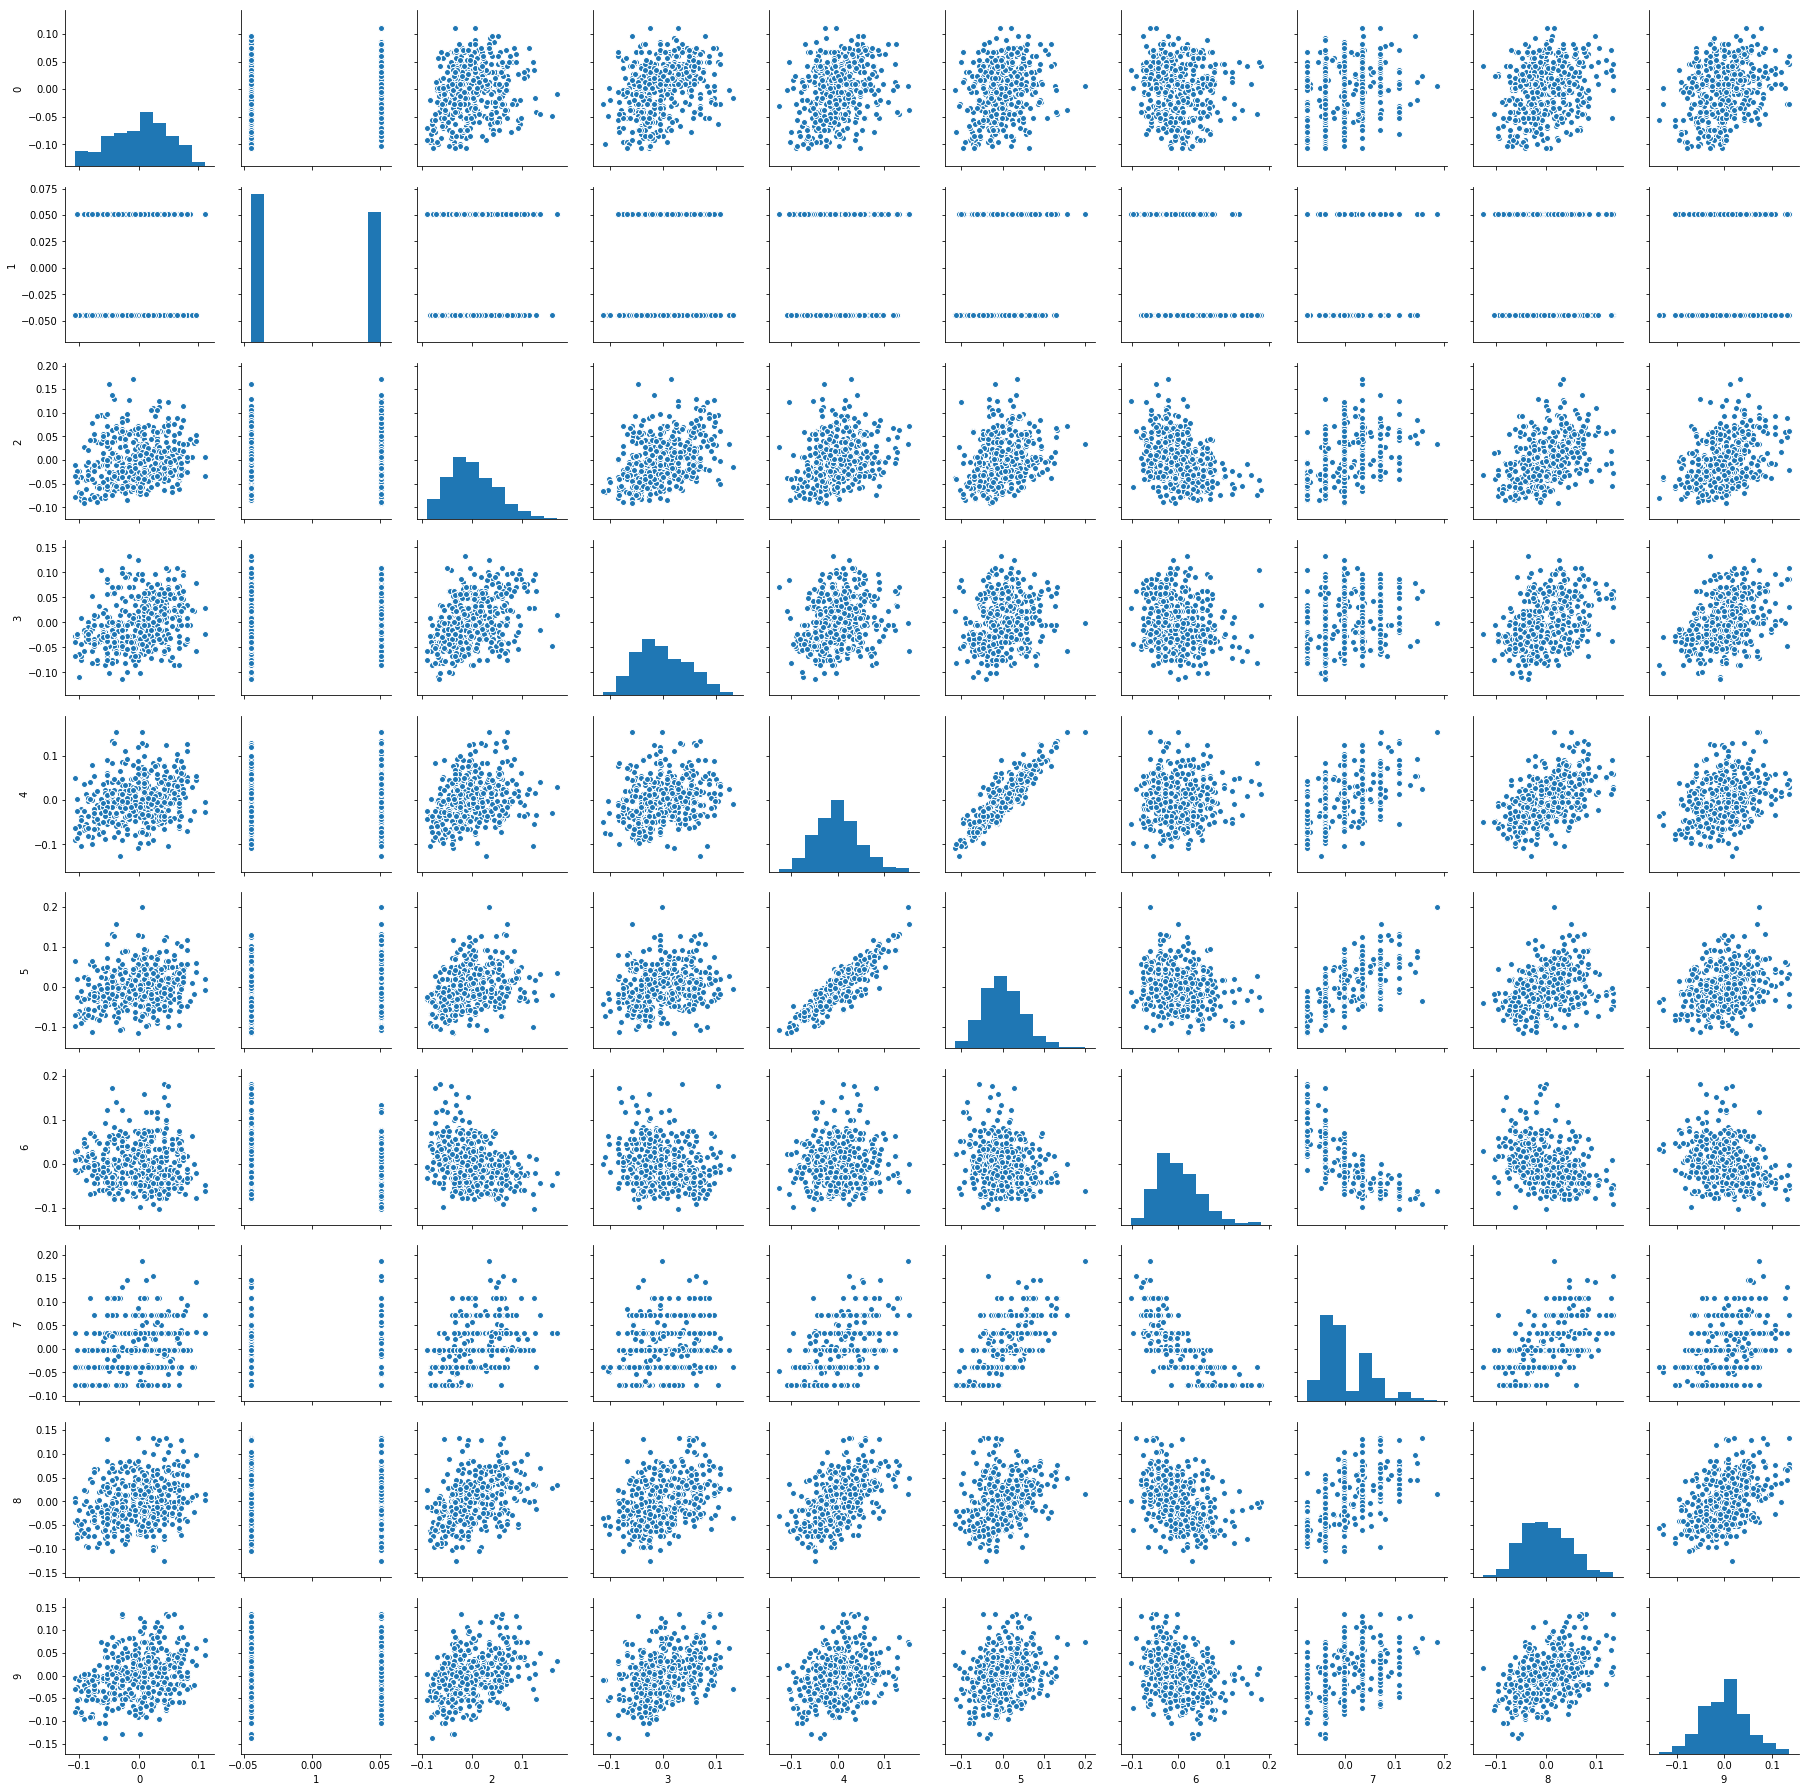

In [91]:
sns.pairplot(pd.DataFrame(X))

In [80]:
data = datasets.load_wine()
X = data.data
y = data.target

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

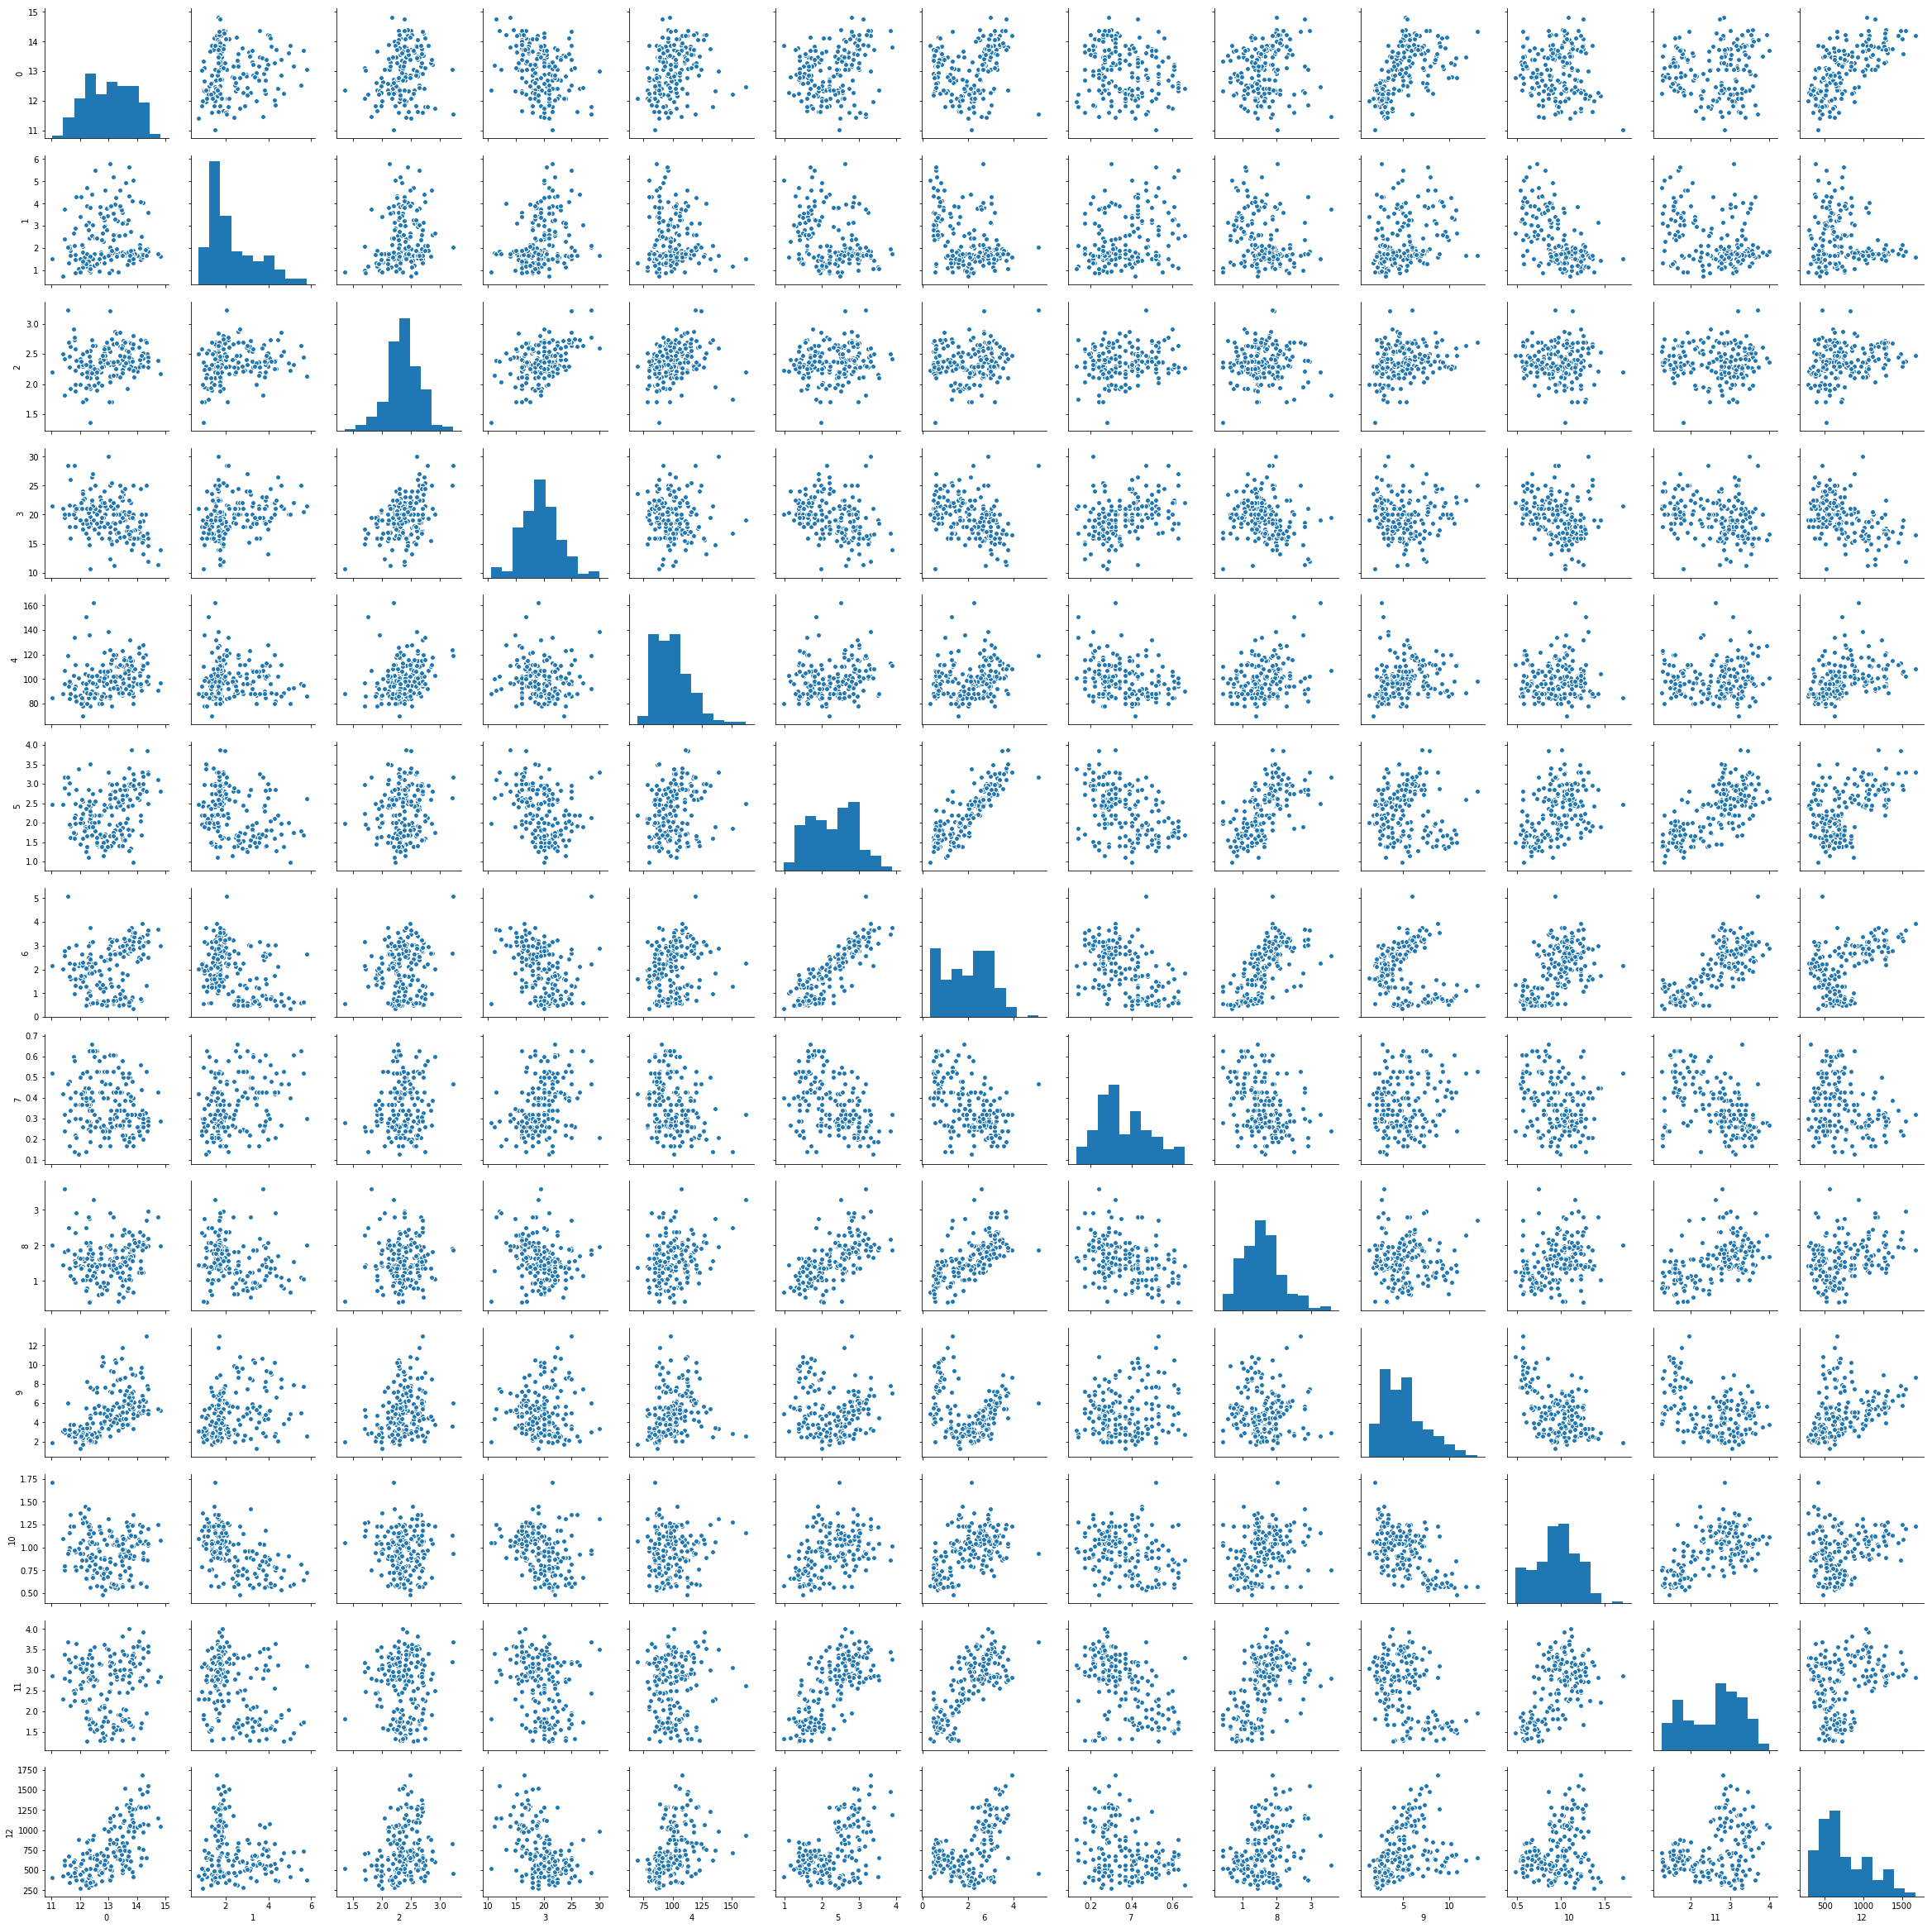

In [76]:
sns.pairplot(pd.DataFrame(data.data))

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
pipe_dicts = merge_two_dicts(
                merge_two_dicts(
                    pipe_dict_gen('standard'),
                    pipe_dict_gen('minmax')
                ),
                pipe_dict_gen('maxabs')
            )

standard_pipelines = []
for scale in ['standard','minmax','maxabs']:
    standard_pipelines += pipe_gen(scale)

In [120]:
for pipe in standard_pipelines:
	pipe.fit(X_train, y_train)

# Compare accuracies
for idx, val in enumerate(standard_pipelines):
	print('%s pipeline test accuracy: %.3f' % (pipe_dicts[idx], val.score(X_test, y_test)))
        if (idx+1) % 4 == 0:
            print ('\n')
# Identify the most accurate model on test data
mean_train = np.mean(y_train)

# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)

print("Baseline MAE is {:.2f}".format(mae_baseline))


best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(standard_pipelines):
	if val.score(X_test, y_test) > best_acc:
		best_acc = val.score(X_test, y_test)
		best_pipe = val
		best_clf = idx
print('Classifier with best accuracy: %s\n' % pipe_dicts[best_clf])


standard - Logistic Regression pipeline test accuracy: 0.000
standard - Support Vector Machine pipeline test accuracy: 0.015
standard - Decision Tree pipeline test accuracy: 0.008
standard - XGBoost pipeline test accuracy: 0.478


minmax - Logistic Regression pipeline test accuracy: 0.008
minmax - Support Vector Machine pipeline test accuracy: 0.008
minmax - Decision Tree pipeline test accuracy: 0.008
minmax - XGBoost pipeline test accuracy: 0.477


maxabs - Logistic Regression pipeline test accuracy: 0.000
maxabs - Support Vector Machine pipeline test accuracy: 0.015
maxabs - Decision Tree pipeline test accuracy: 0.000
maxabs - XGBoost pipeline test accuracy: 0.491


Baseline MAE is 64.26
Classifier with best accuracy: maxabs - XGBoost



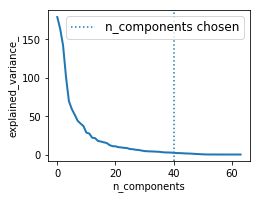

In [22]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

digits = datasets.load_wine()
X_digits = digits.data
y_digits = digits.target

# Plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                              logistic__C=Cs))
estimator.fit(X_digits, y_digits)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

In [35]:
import pandas as pd

In [39]:
exp_var = pd.Series(pca.explained_variance_)

In [59]:
d = [Scatter(y=exp_var,x=exp_var.index,opacity=0.7),
    Scatter(x=[40]*551,y=[0,max(exp_var)],mode='lines')]
iplot(d)

In [60]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()

X, y = iris.data, iris.target

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.960784313725, total=   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.901960784314, total=   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.979166666667, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.941176470588, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.921568627451, total=   0.0s
[C

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.960784313725, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.921568627451, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=1.0, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score=0.980392156863, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score=0.901960784314, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.8s finished


In [61]:
grid_search.best_estimator_

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=2, score_func=<function f_classif at 0x1108fe9b0>))],
       transformer_we...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [62]:
grid_search.best_index_

10

In [63]:
grid_search.best_params_

{'features__pca__n_components': 2, 'features__univ_select__k': 2, 'svm__C': 1}

In [64]:
grid_search.best_score_

0.98

In [14]:
from __future__ import print_function

import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import fetch_20newsgroups
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_footer
from sklearn.datasets.twenty_newsgroups import strip_newsgroup_quoting
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        return [{'length': len(text),
                 'num_sentences': text.count('.')}
                for text in posts]


class SubjectBodyExtractor(BaseEstimator, TransformerMixin):
    """Extract the subject & body from a usenet post in a single pass.

    Takes a sequence of strings and produces a dict of sequences.  Keys are
    `subject` and `body`.
    """
    def fit(self, x, y=None):
        return self

    def transform(self, posts):
        features = np.recarray(shape=(len(posts),),
                               dtype=[('subject', object), ('body', object)])
        for i, text in enumerate(posts):
            headers, _, bod = text.partition('\n\n')
            bod = strip_newsgroup_footer(bod)
            bod = strip_newsgroup_quoting(bod)
            features['body'][i] = bod

            prefix = 'Subject:'
            sub = ''
            for line in headers.split('\n'):
                if line.startswith(prefix):
                    sub = line[len(prefix):]
                    break
            features['subject'][i] = sub

        return features


pipeline = Pipeline([
    # Extract the subject & body
    ('subjectbody', SubjectBodyExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('subject', Pipeline([
                ('selector', ItemSelector(key='subject')),
                ('tfidf', TfidfVectorizer(min_df=50)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('body_bow', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ])),

            # Pipeline for pulling ad hoc features from post's body
            ('body_stats', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'subject': 0.8,
            'body_bow': 0.5,
            'body_stats': 1.0,
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='linear')),
])

# limit the list of categories to make running this example faster.
categories = ['alt.atheism', 'talk.religion.misc']
train = fetch_20newsgroups(random_state=1,
                           subset='train',
                           categories=categories,
                           )
test = fetch_20newsgroups(random_state=1,
                          subset='test',
                          categories=categories,
                          )

pipeline.fit(train.data, train.target)
y = pipeline.predict(test.data)
print(classification_report(y, test.target))

             precision    recall  f1-score   support

          0       0.58      0.81      0.68       229
          1       0.82      0.61      0.70       341

avg / total       0.73      0.69      0.69       570



In [17]:
pipeline = Pipeline([
    # Extract the subject & body
    ('subjectbody', SubjectBodyExtractor()),

    # Use FeatureUnion to combine the features from subject and body
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the post's subject line
            ('subject', Pipeline([
                ('selector', ItemSelector(key='subject')),
                ('tfidf', TfidfVectorizer(min_df=50)),
            ])),

            # Pipeline for standard bag-of-words model for body
            ('body_bow', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('tfidf', TfidfVectorizer()),
                ('best', TruncatedSVD(n_components=50)),
            ])),

            # Pipeline for pulling ad hoc features from post's body
            ('body_stats', Pipeline([
                ('selector', ItemSelector(key='body')),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'subject': 0.8,
            'body_bow': 0.5,
            'body_stats': 1.0,
        },
    )),

    # Use a SVC classifier on the combined features
    ('svc', SVC(kernel='rbf',C=1.0)),
])

# limit the list of categories to make running this example faster.
categories = ['alt.atheism', 'talk.religion.misc']
train = fetch_20newsgroups(random_state=1,
                           subset='train',
                           categories=categories,
                           )
test = fetch_20newsgroups(random_state=1,
                          subset='test',
                          categories=categories,
                          )

pipeline.fit(train.data, train.target)
y = pipeline.predict(test.data)
print(classification_report(y, test.target))

             precision    recall  f1-score   support

          0       0.68      0.55      0.61       400
          1       0.27      0.41      0.33       170

avg / total       0.56      0.50      0.52       570



In [1]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()

X, y = iris.data, iris.target

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=2)

# Maybe some original features where good, too?
selection = SelectKBest(k=1)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:

pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.960784313725, total=   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.901960784314, total=   0.0s
[CV] features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=0.1, features__univ_select__k=1, score=0.979166666667, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.941176470588, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=1 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=1, score=0.921568627451, total=   0.0s
[C

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=0.921568627451, total=   0.0s
[CV] features__pca__n_components=1, svm__C=1, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=1, features__univ_select__k=2, score=1.0, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score=0.980392156863, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score=0.901960784314, total=   0.0s
[CV] features__pca__n_components=1, svm__C=10, features__univ_select__k=2 
[CV]  features__pca__n_components=1, svm__C=10, features__univ_select__k=2, score=1.0, total=   0.0s
[CV] features__pca__n_components=2, svm__C=0.1, features__univ_select__k=1 
[CV]  features__pca__n_components=2, svm__C=0.1, features__univ_select__k=1, score=0.9607

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    0.8s finished


In [6]:
grid_search.best_estimator_.predict()

ValueError: Expected 2D array, got 1D array instead:
array=[0.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.